# Eurofer Properties Database



## Table of Contents
- [Abstract](#abstract)
- [Introduction](#introduction)
- [Section 1: Fabrication & Microstructure](#section-1)
  - [1.1. Ore Extraction](#ore_extraction)
  - [1.2. Tungsten Fabrication Methods](#tungsten_fabrication)
  - [1.3. Microstructure](#microstructure)
- [Section 2: Thermo-physical Properties](#section-2)
  - [2.1. Density](#density)
  - [2.2. Thermal Diffusivity](#diffusivity)
  - [2.3. Specific Heat](#cp)
  - [2.4. Thermal Conductivity](#conductivity)
  - [2.5. Coefficient of Thermal Expansion](#expansion)
  - [2.6. Thermal Emissivity](#emissivity)
  - [2.7. Electrical Resistivity](#resistivity)
  - [2.8. Magnetic Properties](#magnetic)
  - [2.9. Elastic Properties](#elastic)
- [Section 3: Mechanical Properties](#mechanical)

<a id="abstract"></a>
<h2 style="text-align: center;">Abstract</h2>
<p style="text-align: justify;">
This study presents a comprehensive database for tungsten, which aims to assist in the mechanical design of tungsten components, specifically those used in fusion reactor power sources. The database is organized into three main categories: fabrication and microstructure, thermophysical properties, and mechanical properties. Additionally, the study examines the effects of irradiation, including both neutron and ion irradiation, on the properties of tungsten. The data for each property is collected from multiple publicly available sources, and the sources are provided along with links to the original publications for verification or potential corrections. To describe the properties of tungsten, various functional forms are developed based on temperature, and if applicable, the irradiation dose.
</p>

<a id="introduction"></a>
<h2>Introduction</h2>

<a id="section-1"></a>
<h2>Section 1: Fabrication & Microstructure</h2>
<a id="ore_extraction"></a>
<h3> 1.1. Ore Extraction</h3>

The extraction of tungsten from its ores comprises several stages. Eventually, the ore is transformed into tungsten oxide ($WO_3$), which is then subjected to heating with hydrogen or carbon. This heating process leads to the production of powdered tungsten. Due to its exceptionally high melting point, it is not economically viable to cast tungsten ingots. As an alternative, powdered tungsten is combined with small quantities of powdered nickel or other metals and then sintered. Another method for extracting tungsten is through hydrogen reduction of $WF_6$.
\begin{equation}
    WF_6 + 3 H_2 \rightarrow W + 6 HF
\end{equation}

or pyrolytic decomposition \cite{AMT2023}:
\begin{equation}
    WF_6 \rightarrow W + 3 F_2
\end{equation}

<a id="tungsten_fabrication"></a>
<h3> 1.2. Tungsten Fabrication Methods</h3>

Traditional techniques like powder metallurgy, spark plasma sintering, chemical vapor deposition, hot isostatic pressing, and thermoplastic routes are commonly employed to produce tungsten products. These methods are preferred due to tungsten's high ductile-brittle transition temperature. However, an alternative manufacturing approach that offers more flexibility is selective laser melting, a form of 3D printing that allows for the creation of intricate three-dimensional shapes. The main manufacturing routes for tungsten are depicted in Figure 1 and Figure 2. To facilitate future discussions, we will now establish the following terminology:

| Term                        | Abbreviation |
|-----------------------------|--------------|
| Powder Metallurgy            | PM           |
| Single Crystal               | SC           |
| Spark Plasma Sintering       | SPS          |
| Chemical Vapor Deposition    | CVD          |
| Hot Isostatic Pressing       | HIP          |
| Selective Laser Melting      | SLM          |
| Swaging                      | S            |
| Hot Rolling                  | R            |
| Forging                      | F            |
| ASTM Grain Size              | G = ASTM00–ASTM12 |

It should be noted that the ASTM grain size can be determined using the formula (where G represents the ASTM grain number and L represents the average size in microns). The ASTM grain number, G, is defined as the number of grains per square inch at 100x magnification. According to ASTM E112, G is set to 0 when L equals 320 μm. To establish a relationship between the ASTM grain size number, G, and the number of grains per square inch at 100x magnification, N:

$$
L = 320 \times 2^{-\left(\frac{G}{2}\right)}
$$

$$
N = 2^{(G-1)}
$$

$$
G = 2.8854 \ln\left(\frac{320}{L}\right)
$$

Due to the dependence of properties on the method of tungsten preparation, we propose a naming system as follows: `W-(Manufacturing Route)-(Forming Process)-(Grain Size)`. When referring to tungsten (W) data obtained from powder metallurgy (PM) and subsequently formed through hot rolling (HR) with a grain size of 130 microns, it will be identified as **W-PM-HR-ASTM03**. However, if the tungsten is a single crystal with a size of 320 microns, it will be designated as **W-SC-00-ASTM00**. On the other hand, chemical vapor deposition (CVD) tungsten with an average size of 8 microns will be denoted as **W-CVD-00-ASTM11**. This system aims to establish a standardized referencing system for various tungsten data. For example, tungsten produced by Plansee for electrode materials will be referred to as **W-PM-HR-ASTM03** to **W-PM-HR-ASTM08**.

Because the W used in most structural applications is fabricated via the PM route, followed by sintering, followed by rolling, forging, or swaging, we adopt a simpler notation for "structural tungsten," as follows: **(Forming Process)-(Grain Size)**. The designation for structural W would be **R-03** for rolled W with a grain size of 130 μm, etc.

<div style="text-align: center;">
    <img src="Tungsten/Figures/W_fabrication_1.png" alt="Tungsten fabrication processes" style="display: block; margin-left: auto; margin-right: auto;">
    <p style="text-align: center;"><em>Figure 1: Tungsten fabrication processes.</em></p>
</div>

<div style="text-align: center;">
    <img src="Tungsten/Figures/W_fabrication_2.png" alt="Tungsten fabrication processes" style="display: block; margin-left: auto; margin-right: auto;">
    <p style="text-align: center;"><em>Figure 2: Tungsten fabrication processes.</em></p>
</div>

<div style="text-align: center;">
    <img src="Tungsten/Figures/W_extraction.png" alt="Tungsten fabrication processes" style="display: block; margin-left: auto; margin-right: auto;">
    <p style="text-align: center;"><em>Figure 3: Tungsten fabrication processes.</em></p>
</div>


<a id="microstructure"></a>
<h3> 1.3. Microstructure</h3>

![Microstructure](Tungsten/Figures/W_grains.png)
*Figure 4: W microstructure at the grain level.*

<a id="section-2"></a>
<h2>Section 2: Thermophysical Properties</h2>

In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
from Utilities.models_2_0 import *
from Utilities.plots_2_0 import *
from IPython.display import Markdown, display

excel_filename = 'Tungsten/Tungsten.xlsx'
material_name = "Tungsten"
sys.path.append('/path/to/Utilities')

RT = 273
f_size = 10
legend_size = 6
m_size = 50

<a id="density"></a>
<h3>2.1. Density</h3>

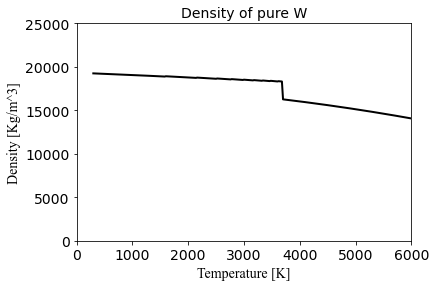

In [12]:
def W_rho(T):
    if 0 <= T <= 3695:
        rho = 19.25 - 2.66207e-4 * (T - 298) - 3.0595e-9 * (T - 298)**2 - 9.5185e-12 * (T - 298)**3
    elif 3695 < T <= 6000:
        rho = 16.267 - 7.679e-4 * (T - 3695) - 8.091e-8 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (0K to 6000K)")
    
    return rho * 1e3

def plot_rho():
    f_size = 14
    T = np.arange(300, 6001, 20)
    rho = np.array([W_rho(t) for t in T])

    plt.figure('W Thermal Conductivity')
    plt.plot(T, rho, 'k', linewidth=2)
    plt.xlabel('Temperature [K]', fontname='Times New Roman', fontsize=f_size)
    plt.ylabel('Density [Kg/m^3]', fontsize=f_size, fontname='Times New Roman')
    plt.xlim([0, 6000])
    plt.ylim([0, 25e3])
    plt.title('Density of pure W', fontsize=f_size)
    plt.gca().tick_params(labelsize=f_size)
    plt.show()

plot_rho()

<a id=diffusivity></a>
<h3>2.2. Thermal Diffusivity</h3>

,WFujitsukaTempC,WFujitsukaThermalDiffusivityCoefmm2/s,WtanabeTempC1,WtanabeThermalDiffusivityCoefmm2/s1,WTouloukianTempC2,WTouloukianThermalDiffusivityCoefmm2/s2,WSingleCrystalTempC3,WSingleCrystalThermalDiffusivityCoefmm2/s3
0,28.201282,71.586071,20.588269,64.556553,23.302820,66.200865,26.069032,68.796319
1,120.537905,69.786949,142.500900,59.774810,78.707603,62.819626,95.101018,64.397353
2,173.971327,65.341435,179.905802,57.562509,120.015090,59.687661,196.352816,58.208601
3,204.686914,61.333514,467.840243,49.052184,221.450146,54.367032,293.027000,53.633560
4,285.317603,60.804963,549.340853,47.167562,325.739377,50.866130,391.670972,51.749179
5,343.121446,54.843398,670.097187,45.166693,426.279736,47.992158,495.298409,49.429797
6,450.093666,51.627290,758.253427,43.927735,522.131093,45.745004,591.253669,47.493850
7,553.402218,48.508590,NaN,NaN,623.629057,43.812208,NaN,NaN
8,642.800094,46.366668,NaN,NaN,722.308960,42.004553,NaN,NaN
9,756.401983,44.863605,NaN,NaN,824.751714,40.322820,NaN,NaN



**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)


**Fitting parameters for Tungsten W_diffusivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 37
    # variables        = 4
    chi-square         = 228.748636
    reduced chi-square = 6.93177684
    Akaike info crit   = 75.4031156
    Bayesian info crit = 81.8467873
    R-squared          = 0.93177780
[[Variables]]
    c0:  69.2682493 +/- 1.32658223 (1.92%) (init = 1)
    c1: -0.05814087 +/- 0.01177767 (20.26%) (init = 1)
    c2:  4.0477e-05 +/- 2.6194e-05 (64.71%) (init = 1)
    c3: -1.3226e-08 +/- 1.5926e-08 (120.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9839
    C(c1, c2) = -0.9674
    C(c1, c3) = +0.9125
    C(c0, c1) = -0.8452
    C(c0, c2) = +0.7237
    C(c0, c3) = -0.6409


**The equation for Tungsten W_diffusivity is:**


<IPython.core.display.Latex object>

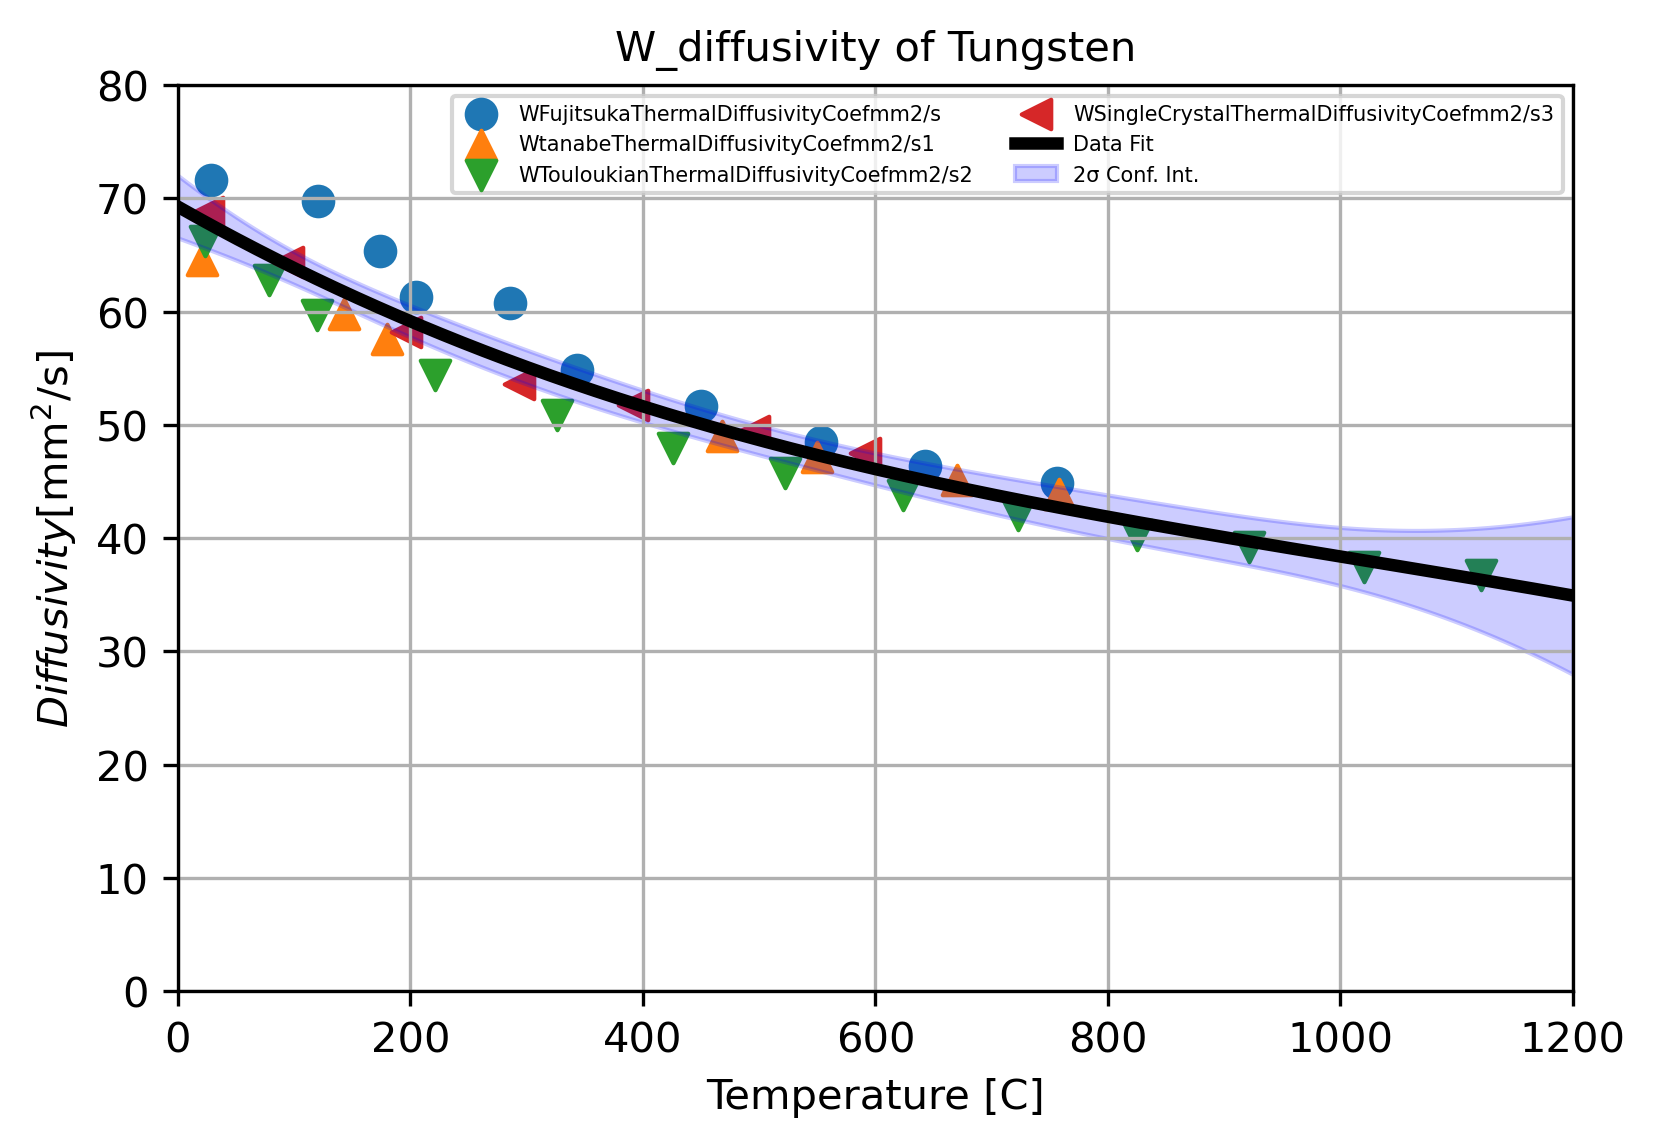

In [14]:
material_property = "W_diffusivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=16)
x_label = 'Temperature [C]'
y_label = r'$Diffusivity [$mm$^2$/s]'
x_lim = [0, 1200]
y_lim = [0, 80]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Fukuda2018--Thermal properties of pure tungsten and its alloys for fusion applications](https://drive.google.com/file/d/1HnPIj_yDMyvEg-_nyPLBX7_9lSo6nPlP/view?usp=drive_link)  
- [Tanabe2003--Temperature dependence of thermal conductivity in W and W–Re alloys from 300 to 1000 K](https://drive.google.com/file/d/1J9fqNc03hZZMfeQ57RfdYDqfaMAiDhWY/view?usp=drive_link)  
- [Touloukian1974--Thermophysical Properties of Matter-The TPRC Data Series. Volume 10. Thermal Diffusivity](https://drive.google.com/file/d/1MQrFR5Kc7M4WEu0LpVEUsT3CWVTF1yF6/view?usp=drive_link)  
- [Fujitsuka2000--Effect of neutron irradiation on thermal diffusivity of tungsten–rhenium alloys](https://drive.google.com/file/d/1LlHMZ-vDTaWnlpitQPfjvOoO5xZGedNo/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,1200,1200)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

diffusivity_coef = [fit_result.params[key].value for key in fit_result.params]

def ThermalDiffusivity(T):
    return sum(diffusivity_coef[i] * T**i for i in range(len(diffusivity_coef)))

<a id=cp></a>
<h3>2.3. Specific Heat</h3>

,WTempK,WCp
0,1260.862944,6.774831
1,1350.518020,6.849642
2,1432.294615,6.914544
3,1500.257352,6.989002
4,1600.753775,7.068879
5,1623.412843,7.088809
6,1680.539054,7.153310
7,1714.034647,7.183195
8,1782.021492,7.233203
9,1810.548436,7.302128



**Data Source:**  
- [Lowenthal1962--The specific heat of metals between 1200 K and 2400 K.](https://drive.google.com/file/d/1Lht4yt4lj6nqYwLpXq2Aohu_0Uwa07xr/view?usp=drive_link)


**Fitting parameters for Tungsten W_specific_heat** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 22
    # variables        = 4
    chi-square         = 4.47791939
    reduced chi-square = 0.24877330
    Akaike info crit   = -27.0214466
    Bayesian info crit = -22.6572768
    R-squared          = 0.99734226
[[Variables]]
    c0:  59.5446164 +/- 20.1649719 (33.87%) (init = 1)
    c1:  0.15498333 +/- 0.03406524 (21.98%) (init = 1)
    c2: -8.6809e-05 +/- 1.8817e-05 (21.68%) (init = 1)
    c3:  1.8477e-08 +/- 3.4028e-09 (18.42%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9986
    C(c1, c2) = -0.9984
    C(c0, c1) = -0.9982
    C(c1, c3) = +0.9941
    C(c0, c2) = +0.9933
    C(c0, c3) = -0.9859


**The equation for Tungsten W_specific_heat is:**


<IPython.core.display.Latex object>

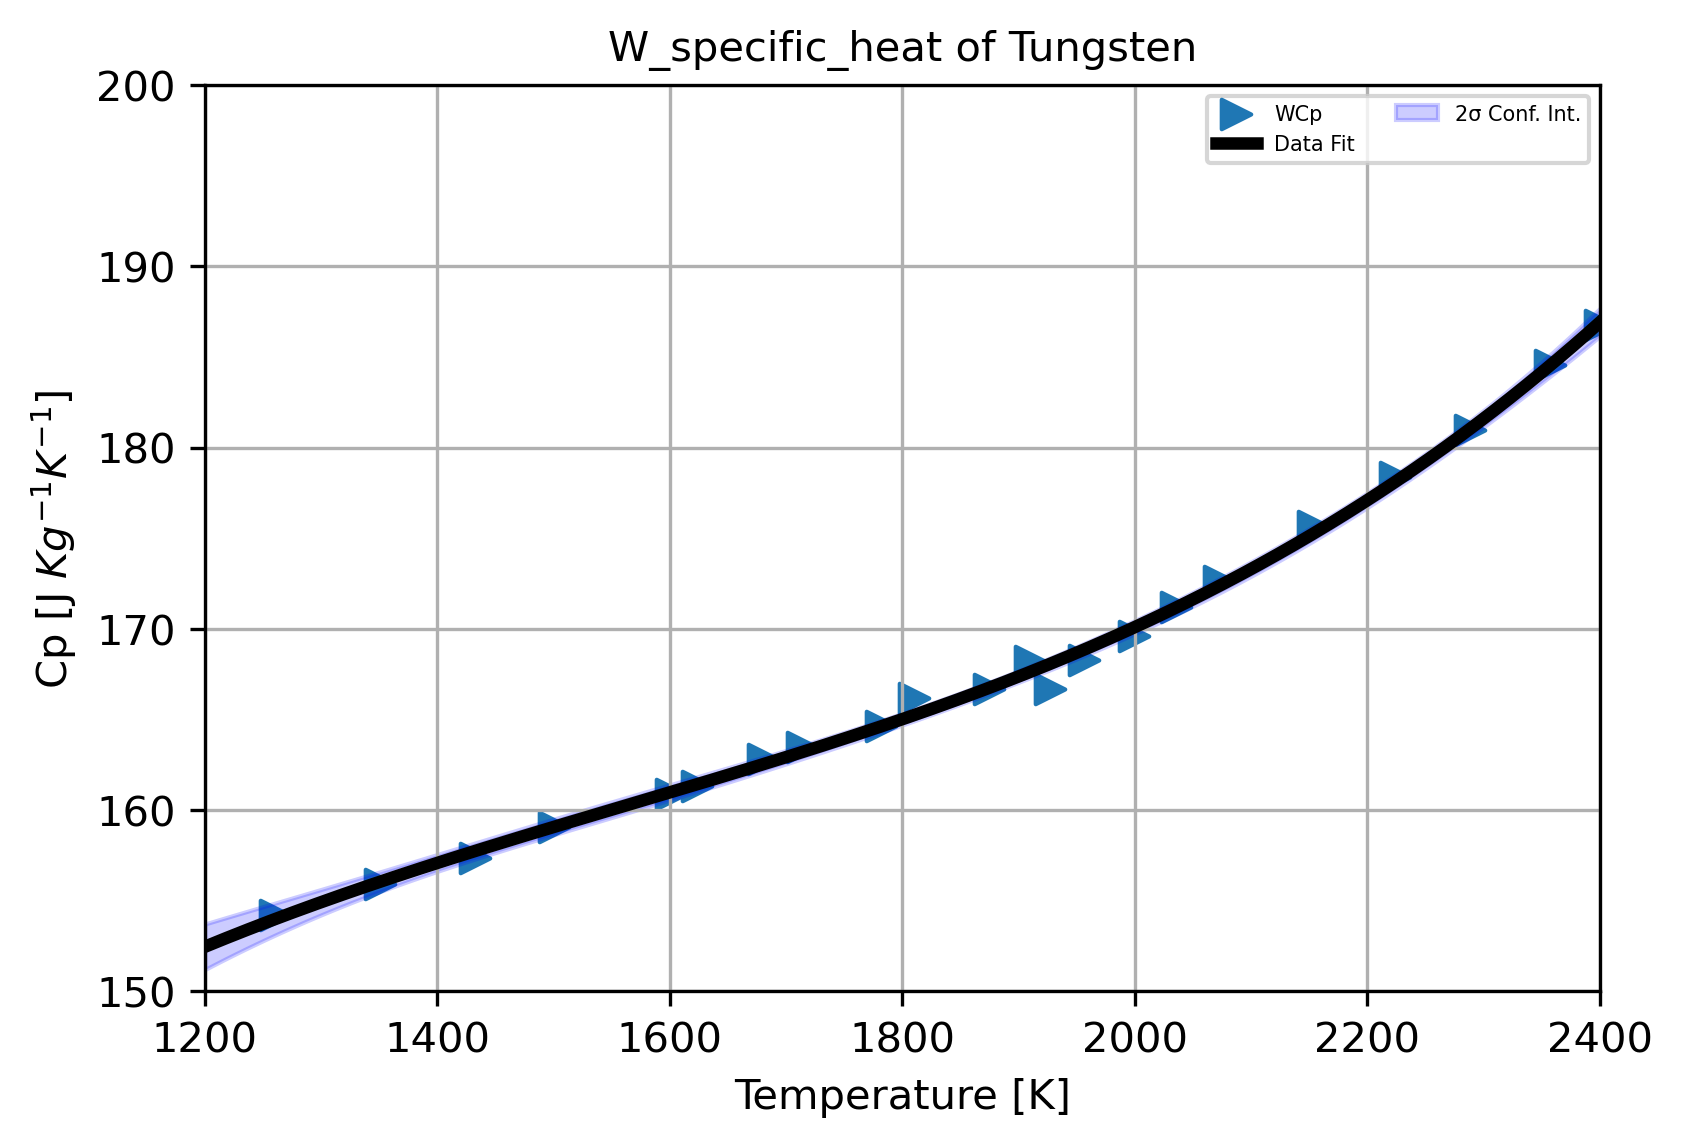

In [16]:
material_property = "W_specific_heat"
var_names, variables, df = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=23)
x_label = 'Temperature [K]'
y_label = r'Cp [J $Kg^{-1} K^{-1}$]'
x_lim = [1200, 2400]
y_lim = [150, 200]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Lowenthal1962--The specific heat of metals between 1200 K and 2400 K.](https://drive.google.com/file/d/1Lht4yt4lj6nqYwLpXq2Aohu_0Uwa07xr/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = [vars_y[0]*22.76]

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(1200,2400,1200)
fit_result = get_model_fit_and_print_it(T_data, Y_data*22.76, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

cp_coef = [fit_result.params[key].value for key in fit_result.params]

def SpecificHeat(T):
    return sum(cp_coef[i] * T**i for i in range(len(cp_coef)))

<a id=cp></a>
<h3>2.4. Conductivity</h3>

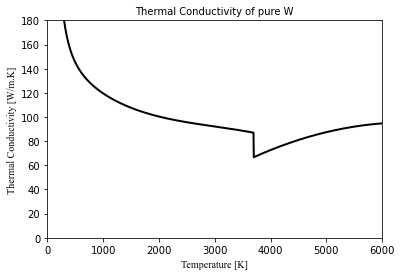


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


In [18]:
def W_k(T):
    if 300 <= T <= 3695:
        k = 149.441 - 45.466e-3 * T + 13.193e-6 * T**2 - 1.484e-9 * T**3 + 3.866e6 / (T**2)
    elif 3695 < T <= 6000:
        k = 66.6212 + 0.02086 * (T - 3695) - 3.7585e-6 * (T - 3695)**2
    else:
        raise ValueError("Temperature is out of the expected range (300K to 6000K)")
    
    return k

T = np.arange(300, 6001, 5)
k = np.array([W_k(int(t)) for t in T])

plt.figure('W Thermal Conductivity')
plt.plot(T, k, 'k', linewidth=2)
plt.xlabel('Temperature [K]', fontname='Times New Roman', fontsize=f_size)
plt.ylabel('Thermal Conductivity [W/m.K]', fontsize=f_size, fontname='Times New Roman')
plt.xlim([0, 6000])
plt.ylim([0, 180])
plt.title('Thermal Conductivity of pure W', fontsize=f_size)
plt.gca().tick_params(labelsize=f_size)
plt.show()
display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant.pdf](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

,WPureTempC,WPureThermalConductivityW/mk,WKdopedTempC1,WKdopedThermalConductivityW/mk1,W1%ReTempC2,W1%ReThermalConductivityW/mk2,W3%ReTempC3,W3%ReThermalConductivityW/mk3,WKdoped3%ReTempC4,WKdoped3%ReThermalConductivityW/mk4,WKdopedRodTempC5,WKdopedRodThermalConductivityW/mk5
0,34.348089,175.566265,32.567222,167.662651,32.161059,147.614458,26.552889,110.795181,31.458085,112.915663,21.350882,174.024096
1,105.680420,176.530120,98.900627,161.879518,96.881529,142.216867,99.474722,110.216867,99.564547,114.650602,97.408760,168.240964
2,204.221749,160.530120,200.859190,154.554217,201.894124,125.638554,196.660874,107.325301,198.406592,113.493976,200.765461,149.927711
3,302.821659,147.421687,301.138427,144.337349,302.235848,118.506024,300.341723,105.012048,303.688661,110.216867,297.807112,139.903614
4,401.566070,141.445783,399.871121,137.783133,402.722071,118.506024,402.483841,106.746988,400.945109,110.795181,399.789108,133.734940
5,501.981996,137.975904,503.563687,136.048193,503.200484,118.120482,502.981781,107.325301,504.688446,111.566265,501.782820,128.144578
6,602.362774,132.771084,602.343247,131.807229,603.647654,116.192771,600.214798,106.746988,603.550019,111.373494,600.562379,123.903614
7,704.356486,127.180723,701.138427,128.337349,700.892386,116.192771,700.693210,106.361446,700.783035,110.795181,699.369276,121.012048
8,801.484056,121.397590,799.921892,124.289157,802.995450,116.000000,801.191150,106.939759,798.027767,110.795181,803.038410,118.120482
9,901.915604,118.698795,901.962469,121.012048,901.860928,116.000000,901.665658,106.361446,903.325457,108.289157,901.896077,117.734940



**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)


**Fitting parameters for Tungsten W_conductivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 72
    # variables        = 4
    chi-square         = 16306.6795
    reduced chi-square = 239.804111
    Akaike info crit   = 398.431806
    Bayesian info crit = 407.538470
    R-squared          = 0.34396187
[[Variables]]
    c0:  151.702102 +/- 6.43366348 (4.24%) (init = 1)
    c1: -0.09483100 +/- 0.05354831 (56.47%) (init = 1)
    c2:  8.1872e-05 +/- 1.1448e-04 (139.83%) (init = 1)
    c3: -2.2489e-08 +/- 6.7867e-08 (301.78%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9868
    C(c1, c2) = -0.9681
    C(c1, c3) = +0.9181
    C(c0, c1) = -0.8404
    C(c0, c2) = +0.7157
    C(c0, c3) = -0.6348


**The equation for Tungsten W_conductivity is:**


<IPython.core.display.Latex object>

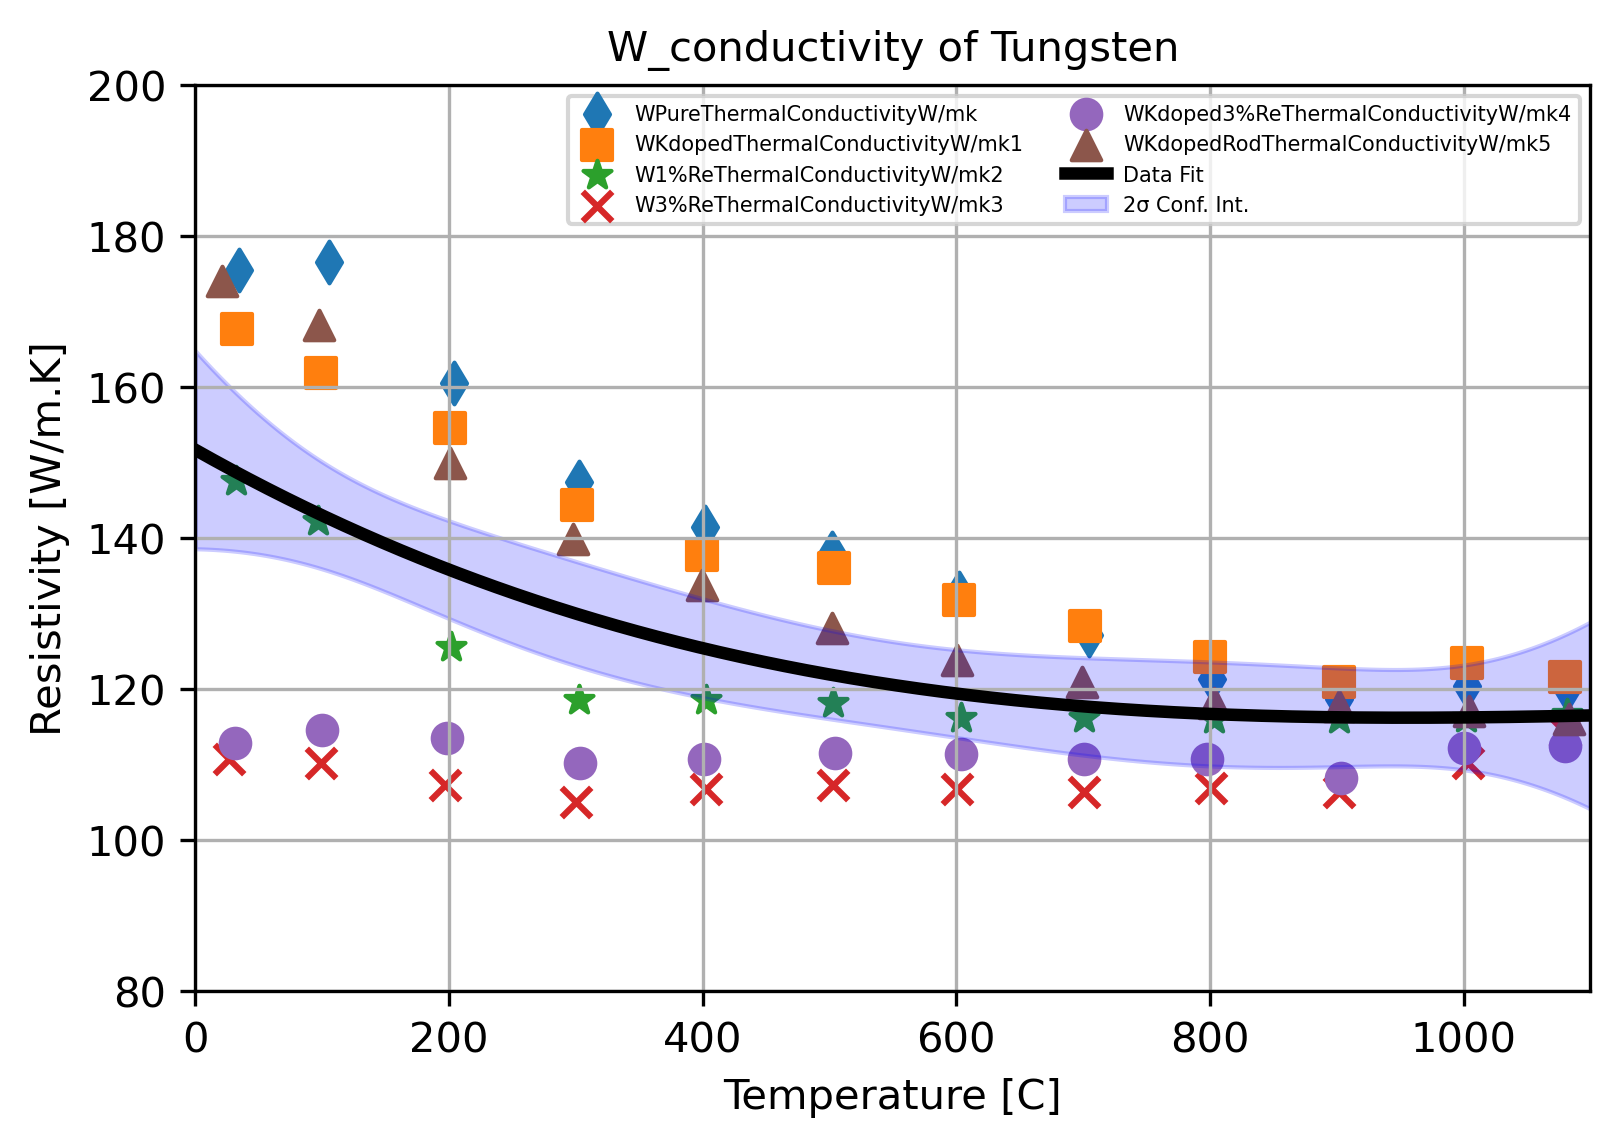

In [19]:
material_property = "W_conductivity"
var_names, variables, datafream = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15)
x_label='Temperature [C]'
y_label=r'Resistivity [W/m.K]'
x_lim=[0, 1100]
y_lim=[80, 200]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,1100,1100)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

rho_coeff = [fit_result.params[key].value for key in fit_result.params]

def ThermalConductivity(T):
    return sum(rho_coeff[i] * T**i for i in range(len(rho_coeff)))

<a id=cp></a>
<h3>2.5. Resistivity</h3>

,WForsytheTempK,WForsytheElectricalResistivityx108ohmm,WDesiaTempK1,WDesiaElectricalResistivityx108ohmm1,WRudkinTempK2,WRudkinElectricalResistivityx108ohmm2
0,300.0,7.18,10,0.000137,1540.61,39.63
1,400.0,10.26,15,0.000567,1810.32,51.19
2,500.0,13.66,20,0.001960,2079.63,57.10
3,600.0,17.23,30,0.013300,2345.26,67.27
4,800.0,24.80,40,0.054300,2610.41,81.49
5,900.0,28.75,50,0.141000,NaN,NaN
6,1000.0,32.73,60,0.266000,NaN,NaN
7,1100.0,36.84,70,0.422000,NaN,NaN
8,1200.0,40.80,80,0.606000,NaN,NaN
9,1300.0,44.90,90,0.809000,NaN,NaN


**Fitting parameters for Tungsten W_resistivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 78
    # variables        = 4
    chi-square         = 6285.02881
    reduced chi-square = 84.9328218
    Akaike info crit   = 350.358917
    Bayesian info crit = 359.785752
    R-squared          = 0.95724750
[[Variables]]
    c0: -0.88809929 +/- 2.73304928 (307.74%) (init = 1)
    c1:  0.02235828 +/- 0.00791093 (35.38%) (init = 1)
    c2:  6.8229e-06 +/- 5.5847e-06 (81.85%) (init = 1)
    c3: -6.1012e-10 +/- 1.0581e-09 (173.43%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9852
    C(c1, c2) = -0.9635
    C(c1, c3) = +0.9084
    C(c0, c1) = -0.7547
    C(c0, c2) = +0.6068
    C(c0, c3) = -0.5227


**The equation for Tungsten W_resistivity is:**


<IPython.core.display.Latex object>

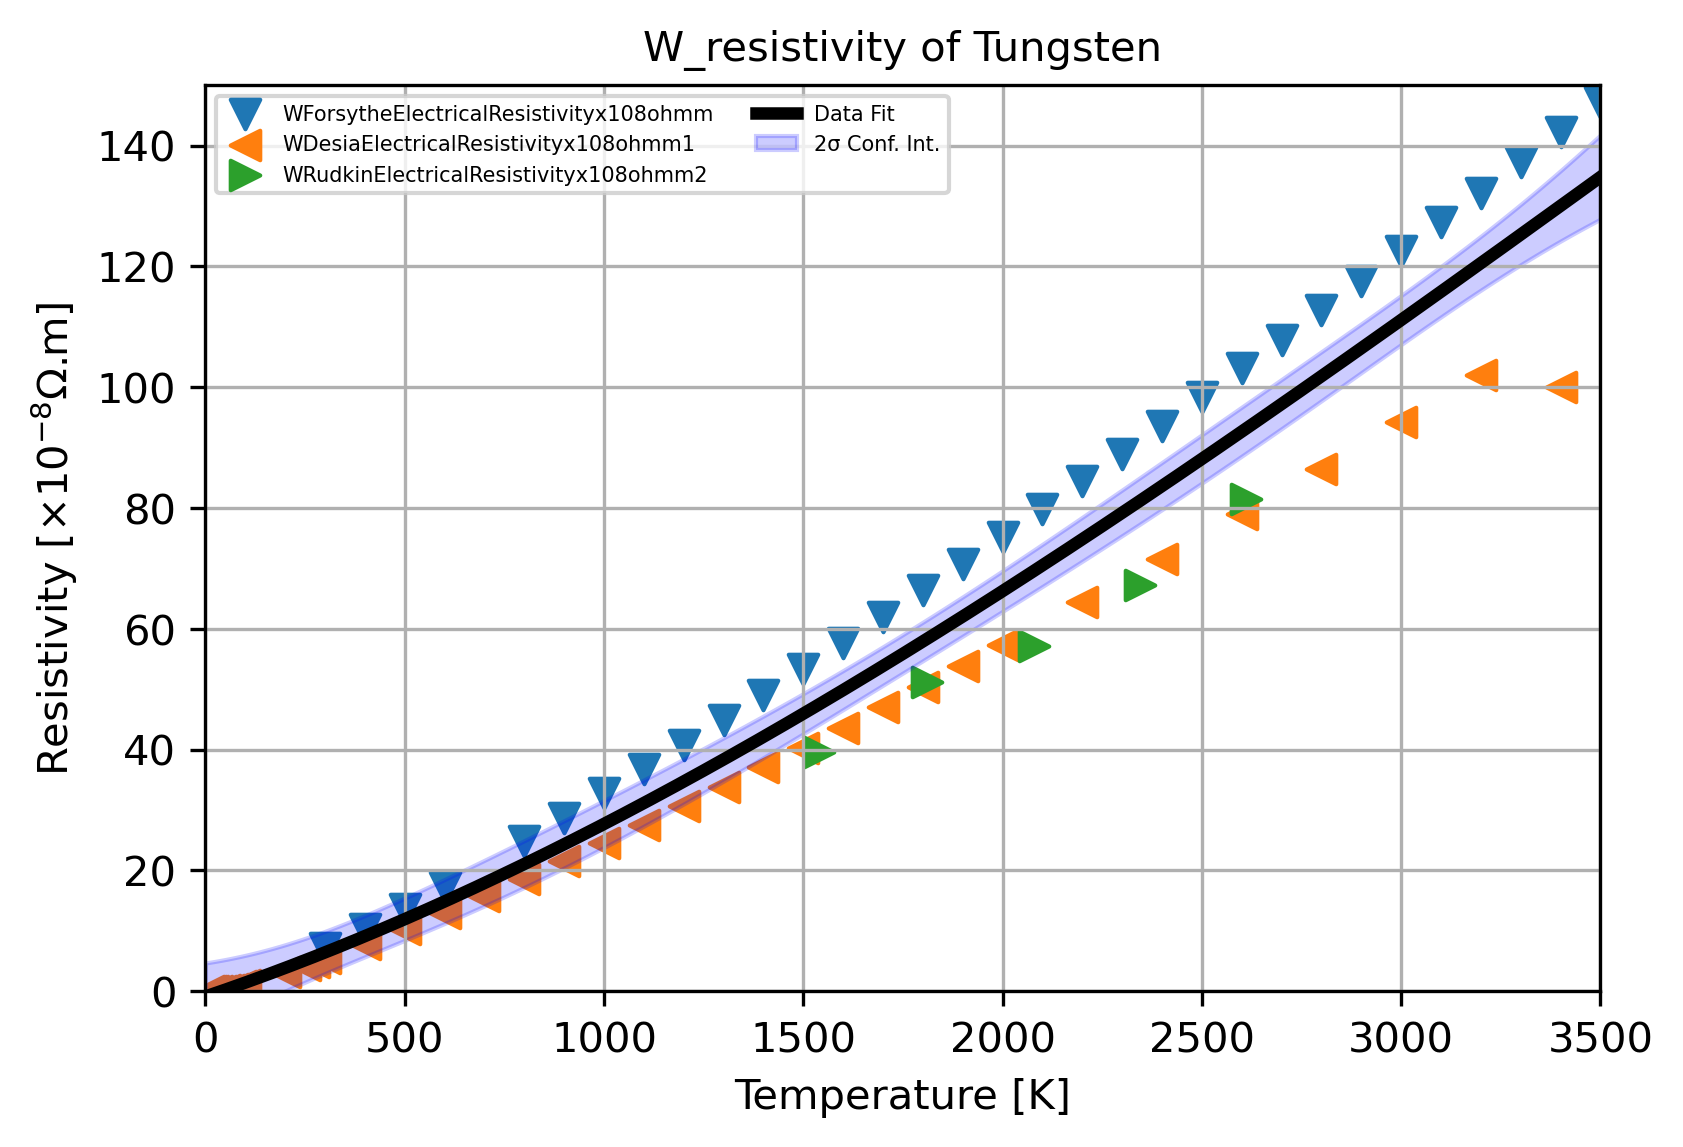

In [21]:
material_property = "W_resistivity"
var_names, variables, datafream = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=40)
x_label='Temperature [K]'
y_label=r'Resistivity [$\times 10^{-8} \Omega$.m]'
x_lim=[0, 3500]
y_lim=[0, 150]
data_labels = [var.split('_')[0] for var in var_names[1::2]]

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,3500,3500)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

rho_coeff = [fit_result.params[key].value for key in fit_result.params]

def ElectricalResistivity(T):
    return sum(rho_coeff[i] * T**i for i in range(len(rho_coeff)))

<a id=cp></a>
<h3>2.6. CTE</h3>

,EUROFER97TempF,EUROFER97CoefficientofThermalExpansion
0,799.640820,2.423116
1,2195.319239,2.760268
2,3619.283612,4.164268
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN



**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


**Fitting parameters for Tungsten W_CTE** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 3
    # variables        = 3
    chi-square         = 1.9722e-31
    reduced chi-square = 1.9722e-31
    Akaike info crit   = -209.398874
    Bayesian info crit = -212.103037
    R-squared          = 1.00000000
[[Variables]]
    c0:  2.69340743 +/- 1.1224e-15 (0.00%) (init = 1)
    c1: -5.4913e-04 +/- 1.2310e-18 (0.00%) (init = 1)
    c2:  2.6401e-07 +/- 2.7368e-22 (0.00%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9835
    C(c0, c1) = -0.9345
    C(c0, c2) = +0.8697


**The equation for Tungsten W_CTE is:**


<IPython.core.display.Latex object>

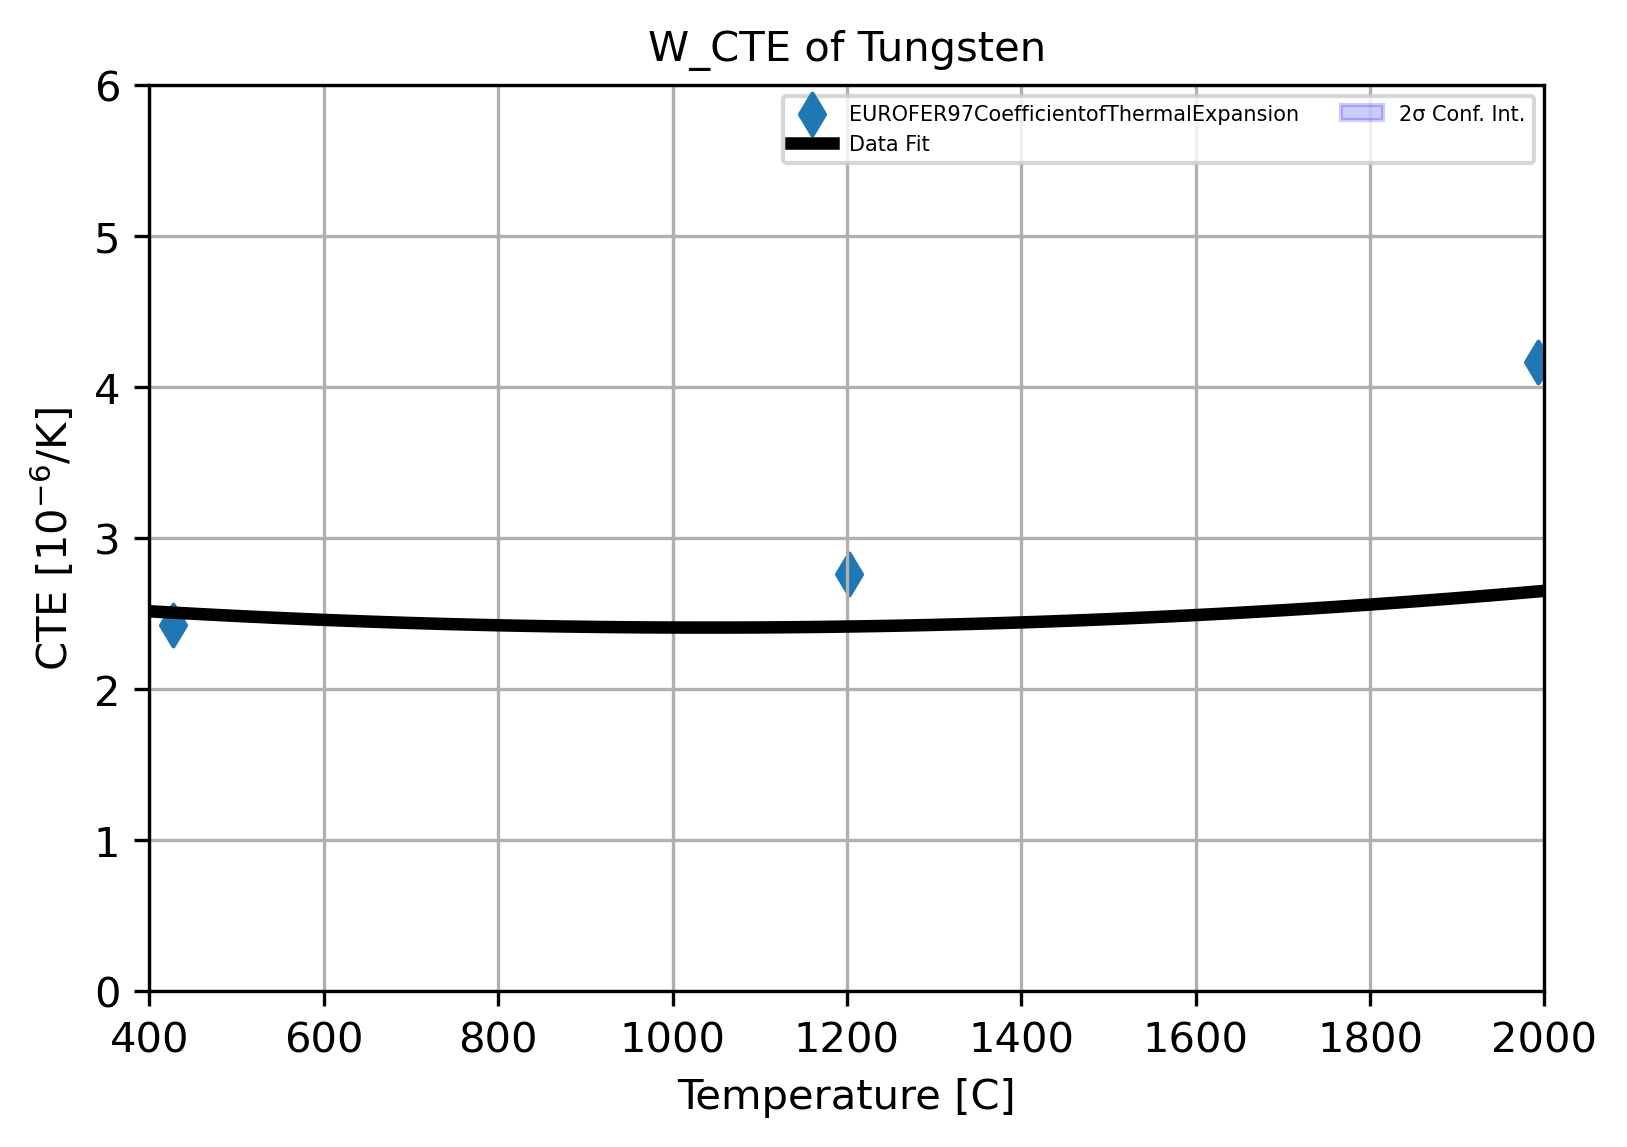

In [23]:
material_property = "W_CTE"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=7)

x_label='Temperature [C]'
y_label=r'CTE [$10^{-6}$/K]'
x_lim=[400,2000]
y_lim=[0, 6]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))


# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [(vars_x[0]-32)/1.8]
y_data_list = vars_y
# Fit the data
p = [1, 1,1]
T = np.linspace(300,2000,100)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

CTE_coef = [fit_result.params[key].value for key in fit_result.params]

def CTE(T):
    return sum(CTE_coef[i] * T**i for i in range(len(CTE_coef)))

<a id=cp></a>
<h3>2.7. Emissivity</h3>

,WMinissale_shortTempK,WMinissale_shortThermalEmissivity,WMinissale_longTempK1,WMinissale_longThermalEmissivity1,WMinissale_intermediateTempK2,WMinissale_intermediateThermalEmissivity2,WBroduTempK3,WBroduThermalEmissivity3,WRudkinTempK4,WRudkinThermalEmissivity4,WMatsumotoTempK5,WMatsumotoThermalEmissivity5,WWorthingTempK6,WWorthingThermalEmissivity6
0,42.44,0.02905,38.40,0.01385,43.07,0.01643,853.44,0.06718,1364.00,0.27669,1833.14,0.23873,1345.01,0.19629
1,158.90,0.04481,160.25,0.02073,156.92,0.02264,884.53,0.08141,1683.16,0.31258,1959.11,0.25306,1869.29,0.26863
2,276.74,0.06636,273.45,0.03824,277.69,0.03753,925.21,0.11031,1961.84,0.33309,2079.38,0.26529,2416.00,0.31879
3,461.49,0.10078,457.42,0.06514,460.21,0.06141,1024.28,0.15948,2244.50,0.34633,2163.37,0.27372,2958.98,0.34808
4,589.35,0.13616,610.29,0.08453,593.49,0.08716,1125.40,0.20176,2542.71,0.35573,2258.82,0.28299,3500.04,0.37027
5,724.59,0.16511,706.32,0.11330,721.15,0.11167,1160.33,0.22246,2819.71,0.35787,2354.32,0.28890,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1240.15,0.24877,NaN,NaN,2447.86,0.29859,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,1343.66,0.25999,NaN,NaN,2541.46,0.30323,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,1349.31,0.27551,NaN,NaN,2682.83,0.30955,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,1427.43,0.28414,NaN,NaN,2789.79,0.31630,NaN,NaN



**Data Source:**  
- [Forsythe--THE PROPERTIES OF TUNGSTEN AND THE CHAR- ACTERISTICS OF TUNGSTEN LAMPS.pdf](https://drive.google.com/file/d/1Iw3L-8V_43S0NLxPDxP7yJ_A2h379dj4/view?usp=drive_link)
- [Matsumoto1999--Hemispherical Total Emissivity of Niobium, Molybdenum, and Tungsten at High Temperatures Using a Combined Transient and Brief Steady-State Technique.pdf](https://drive.google.com/file/d/1c6v2C_VoiWPI9h5eGWFHrmb0IjQ2oIyH/view?usp=drive_link)
- [Brodu2015--Evolution of the emissivity of tungsten at high temperature with and without proton bombardment](https://drive.google.com/file/d/1zZ0fDKf94yGSIllnX69O0zBpwyMcAWUI/view?usp=drive_link)


**Fitting parameters for Tungsten W_emissivity** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 56
    # variables        = 4
    chi-square         = 0.05520446
    reduced chi-square = 0.00106162
    Akaike info crit   = -379.635542
    Bayesian info crit = -371.534135
    R-squared          = 0.92611445
[[Variables]]
    c0: -0.00834306 +/- 0.01400265 (167.84%) (init = 1)
    c1:  2.1892e-04 +/- 3.7608e-05 (17.18%) (init = 1)
    c2: -3.5127e-08 +/- 2.6223e-08 (74.65%) (init = 1)
    c3:  2.7725e-13 +/- 5.0924e-12 (1836.76%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9834
    C(c1, c2) = -0.9639
    C(c1, c3) = +0.9046
    C(c0, c1) = -0.8389
    C(c0, c2) = +0.7067
    C(c0, c3) = -0.6168


**The equation for Tungsten W_emissivity is:**


<IPython.core.display.Latex object>

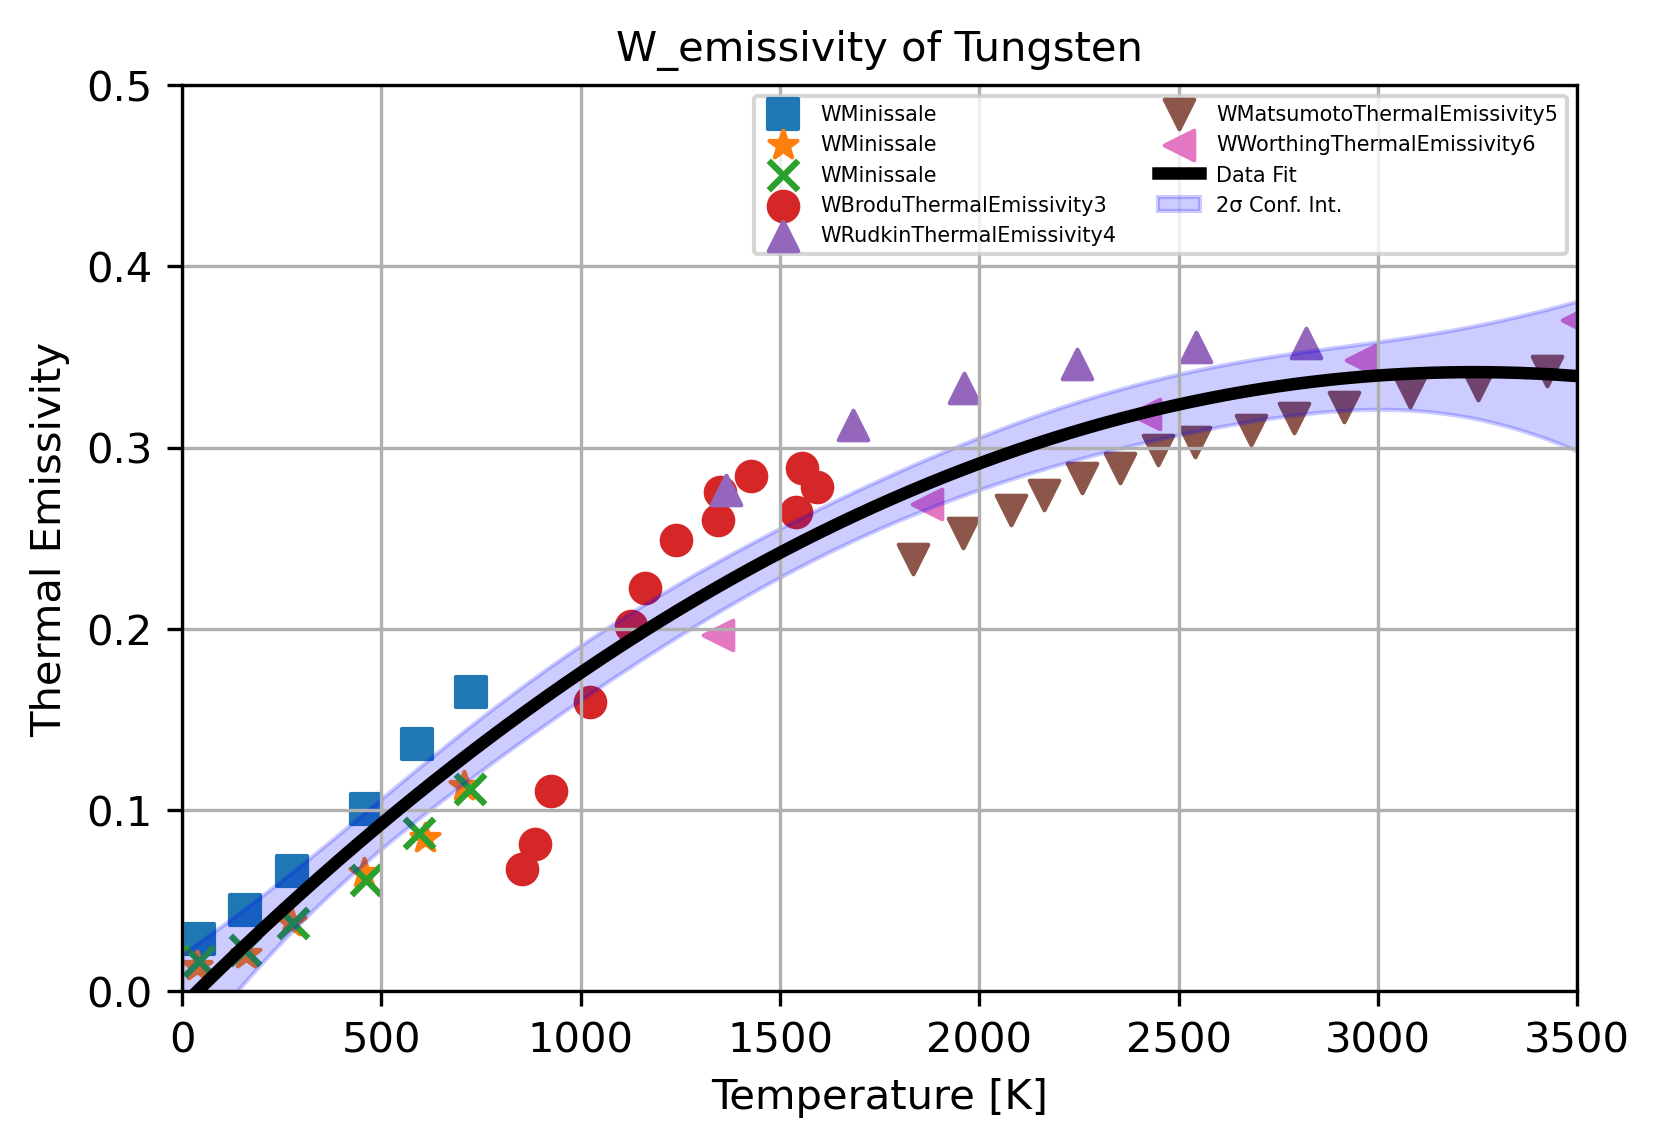

In [25]:
material_property = "W_emissivity"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=20)
x_label = 'Temperature [K]'
y_label = r'Thermal Emissivity'
x_lim=[0, 3500]
y_lim=[0, 0.5]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Forsythe--THE PROPERTIES OF TUNGSTEN AND THE CHAR- ACTERISTICS OF TUNGSTEN LAMPS.pdf](https://drive.google.com/file/d/1Iw3L-8V_43S0NLxPDxP7yJ_A2h379dj4/view?usp=drive_link)
- [Matsumoto1999--Hemispherical Total Emissivity of Niobium, Molybdenum, and Tungsten at High Temperatures Using a Combined Transient and Brief Steady-State Technique.pdf](https://drive.google.com/file/d/1c6v2C_VoiWPI9h5eGWFHrmb0IjQ2oIyH/view?usp=drive_link)
- [Brodu2015--Evolution of the emissivity of tungsten at high temperature with and without proton bombardment](https://drive.google.com/file/d/1zZ0fDKf94yGSIllnX69O0zBpwyMcAWUI/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1, 1]
T = np.linspace(0,3500,3500)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

emit1_coef = [fit_result.params[key].value for key in fit_result.params]

def NormalEmissivity(T):
    return sum(emit1_coef[i] * T**i for i in range(len(emit1_coef)))

<a id=cp></a>
<h3>2.8. Elastic</h3> 

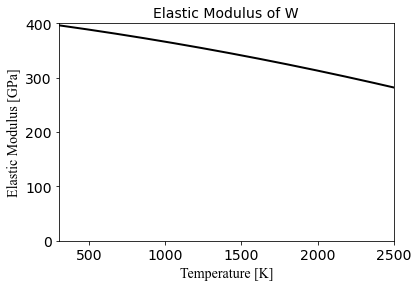


**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)


In [27]:
def Young(T):
    return 4.0761e11 - 3.5521e7 * T - 5.871e3 * T**2

# Calculate the elastic modulus (E) in GPa
E = np.array([Young(t) for t in T]) * 1e-9

# Plot the elastic modulus as a function of temperature
fsize = 14
plt.figure('W Elastic Modulus')
plt.plot(T, E, 'k', linewidth=2)
plt.xlabel('Temperature [K]', fontname='Times New Roman', fontsize=fsize)
plt.ylabel('Elastic Modulus [GPa]', fontsize=fsize, fontname='Times New Roman')
plt.xlim([300, 2500])
plt.ylim([0, 400])
plt.title('Elastic Modulus of W', fontsize=fsize)
plt.gca().tick_params(labelsize=fsize)
plt.show()

display(Markdown("""
**Data Source:**  
- [Tolias2017--thermophysical properties of solid and liquid tungsten relevant](https://drive.google.com/file/d/1yjf497SdhnkfiJqxQwKkY1LkHd0omkAP/view?usp=drive_link)
"""))

<a id=cp></a>
<h3>2.9. Hardness</h3m> 

,WTempC,WHardnessVHN
0,1200.408092,472.843729
1,1300.438301,446.403085
2,1398.957157,442.182956
3,1499.186996,373.181332
4,1599.562582,373.106427
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN



**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)


**Fitting parameters for Tungsten W_hardness** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 5
    # variables        = 2
    chi-square         = 919.339357
    reduced chi-square = 306.446452
    Akaike info crit   = 30.0710870
    Bayesian info crit = 29.2899629
    R-squared          = 0.89004103
[[Variables]]
    c0:  804.494646 +/- 78.1062266 (9.71%) (init = 1)
    c1: -0.27359308 +/- 0.05552068 (20.29%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c0, c1) = -0.9950


**The equation for Tungsten W_hardness is:**


<IPython.core.display.Latex object>

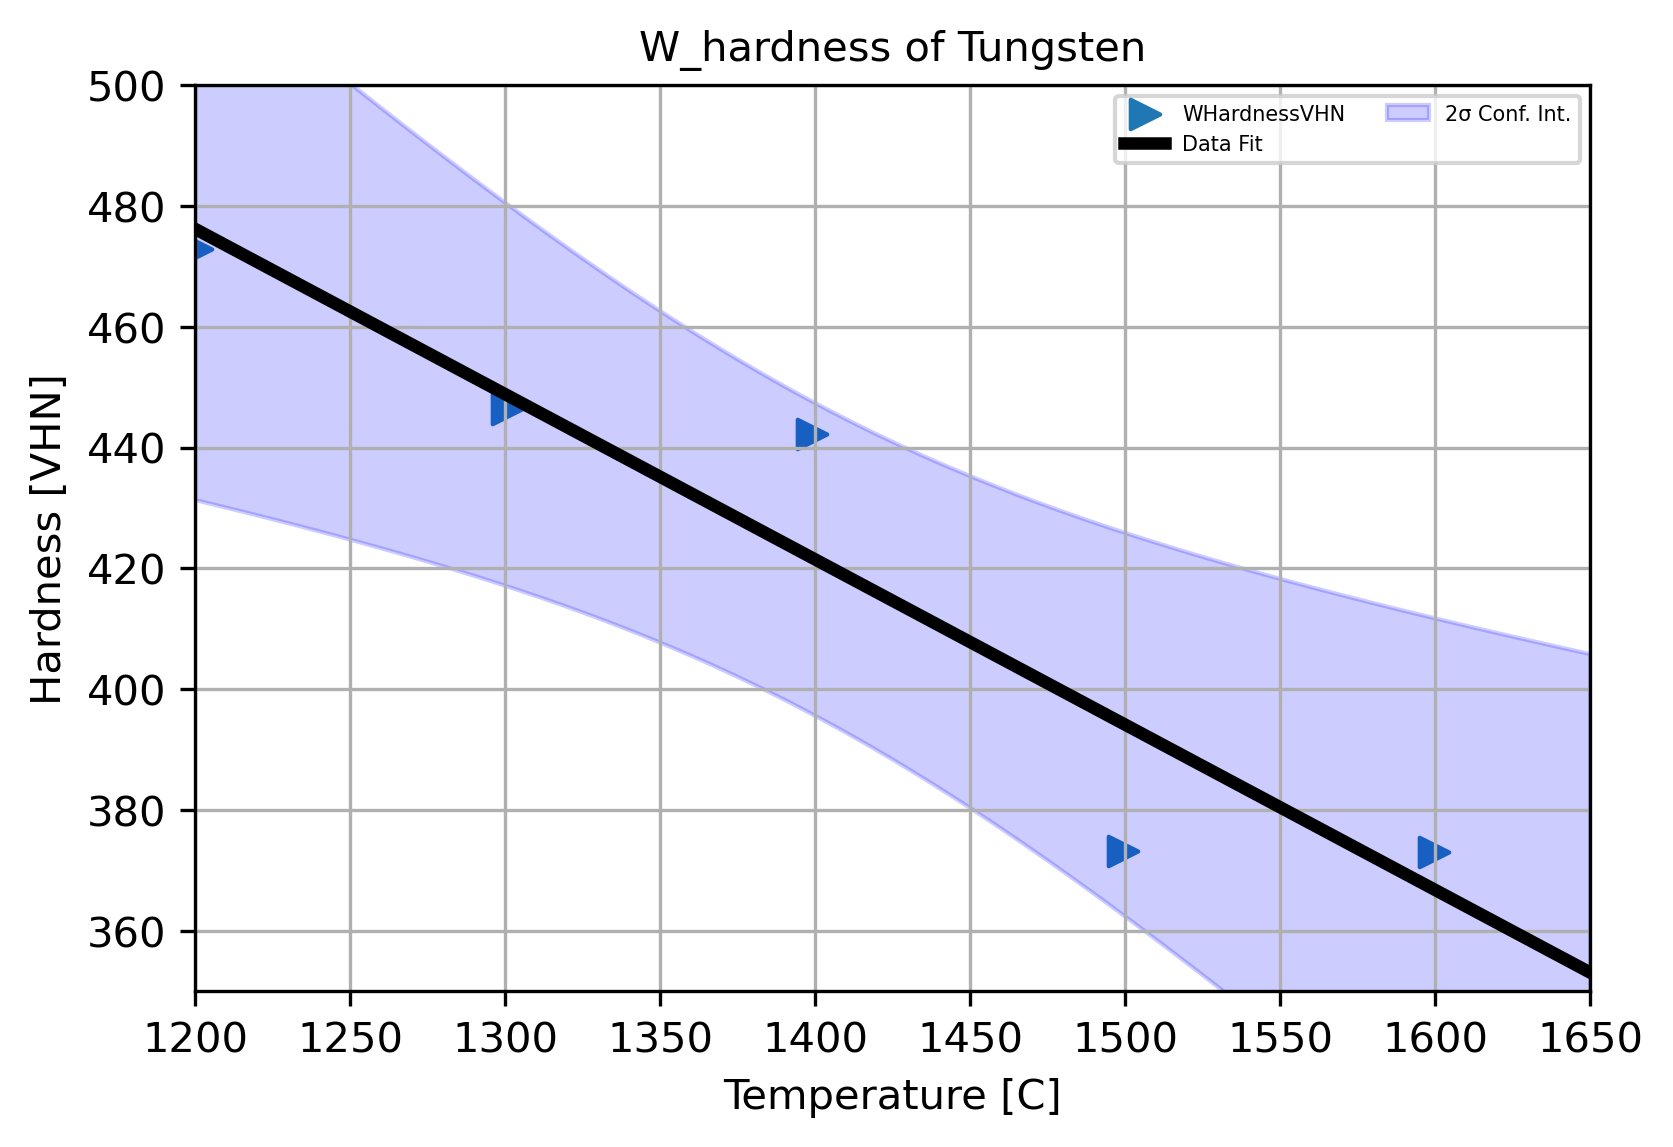

In [29]:
material_property = "W_hardness"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=12)
x_label = 'Temperature [C]'
y_label = 'Hardness [VHN]'
x_lim=[1200, 1650]
y_lim=[350, 500]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Schmnidt1963--THE ENGINEERING PROPERTIES OF TUNGSTEN AND TUNGSTEN ALLOYS.pdf](https://drive.google.com/file/d/1zVKWktn90TJ5NX6dQBbdpRMyT2ylgfMw/view?usp=drive_link)
"""))

# Concatenate and sort data for fitting
vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1]
T = np.linspace(1200, 1650, 1000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

Hardness_coeff  = [fit_result.params[key].value for key in fit_result.params]  # Extract parameter values as a list

# Define the polynomial function
def Hardness(T):
    return sum(Hardness_coeff[i] * T**i for i in range(len(Hardness_coeff)))

<a id=cp></a>
<h3>2.10. W_Yield_Strength</h3m> 

,WPlanseeTempK,WPlanseeYieldStrengthMPa,WDruryTempK1,WDruryYieldStrengthMPa1,WStreichenTempK2,WStreichenYieldStrengthMPa2,WShenTempK3,WShenYieldStrengthMPa3,WSkoroSWTempK4,WSkoroSWYieldStrengthMPa4,WSkoroHRTempK5,WSkoroHRYieldStrengthMPa5
0,472.0,1222.05,291.359853,1377.464963,321.959608,1290.896024,471.086464,668.829189,1719.556262,85.381738,1962.194579,51.986327
1,501.0,1182.21,808.495716,897.391796,471.898409,909.971511,523.717640,605.793381,1772.407427,80.581656,2015.209410,46.934924
2,527.0,1147.42,1099.193390,696.247691,661.616891,710.697735,574.477599,510.297814,1825.258593,73.248199,2072.024380,42.330818
3,552.0,1113.33,1374.591187,474.358389,863.575275,580.628275,623.065518,473.581928,1924.354529,63.914707,2132.625355,37.319386
4,578.0,1079.23,1637.749082,242.102842,1080.833537,483.417732,673.019885,472.422487,2018.495668,54.447880,2231.178584,33.810091
5,603.0,1044.44,1916.206854,70.394718,1258.312118,432.986612,722.102376,435.702777,2117.591604,44.314374,2292.530702,28.350929
6,628.0,1010.34,2200.784578,35.390111,NaN,NaN,471.140000,652.591662,2229.900331,36.314239,2373.683791,27.651338
7,664.0,976.25,2479.242350,24.621418,NaN,NaN,521.864268,567.921113,2325.693069,31.247486,2473.004317,24.671021
8,679.0,942.15,NaN,NaN,NaN,NaN,572.644622,466.239822,2429.743801,27.247418,2573.097525,22.545251
9,705.0,907.36,NaN,NaN,NaN,NaN,621.168807,448.854325,2527.188138,23.114015,NaN,NaN


**Fitting parameters for Tungsten W_Yield_Strength** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 82
    # variables        = 5
    chi-square         = 2401742.14
    reduced chi-square = 31191.4563
    Akaike info crit   = 853.368825
    Bayesian info crit = 865.402422
    R-squared          = 0.79607990
[[Variables]]
    c0:  1990.78151 +/- 361.778104 (18.17%) (init = 1)
    c1: -3.52119069 +/- 1.29564714 (36.80%) (init = 1)
    c2:  0.00336392 +/- 0.00156322 (46.47%) (init = 1)
    c3: -1.5776e-06 +/- 7.6096e-07 (48.23%) (init = 1)
    c4:  2.6739e-10 +/- 1.2825e-10 (47.96%) (init = 4)
[[Correlations]] (unreported correlations are < 0.100)
    C(c3, c4) = -0.9941
    C(c2, c3) = -0.9912
    C(c1, c2) = -0.9863
    C(c0, c1) = -0.9813
    C(c2, c4) = +0.9716
    C(c1, c3) = +0.9568
    C(c0, c2) = +0.9393
    C(c1, c4) = -0.9224
    C(c0, c3) = -0.8914
    C(c0, c4) = +0.8453


**The equation for Tungsten W_Yield_Strength is:**


<IPython.core.display.Latex object>

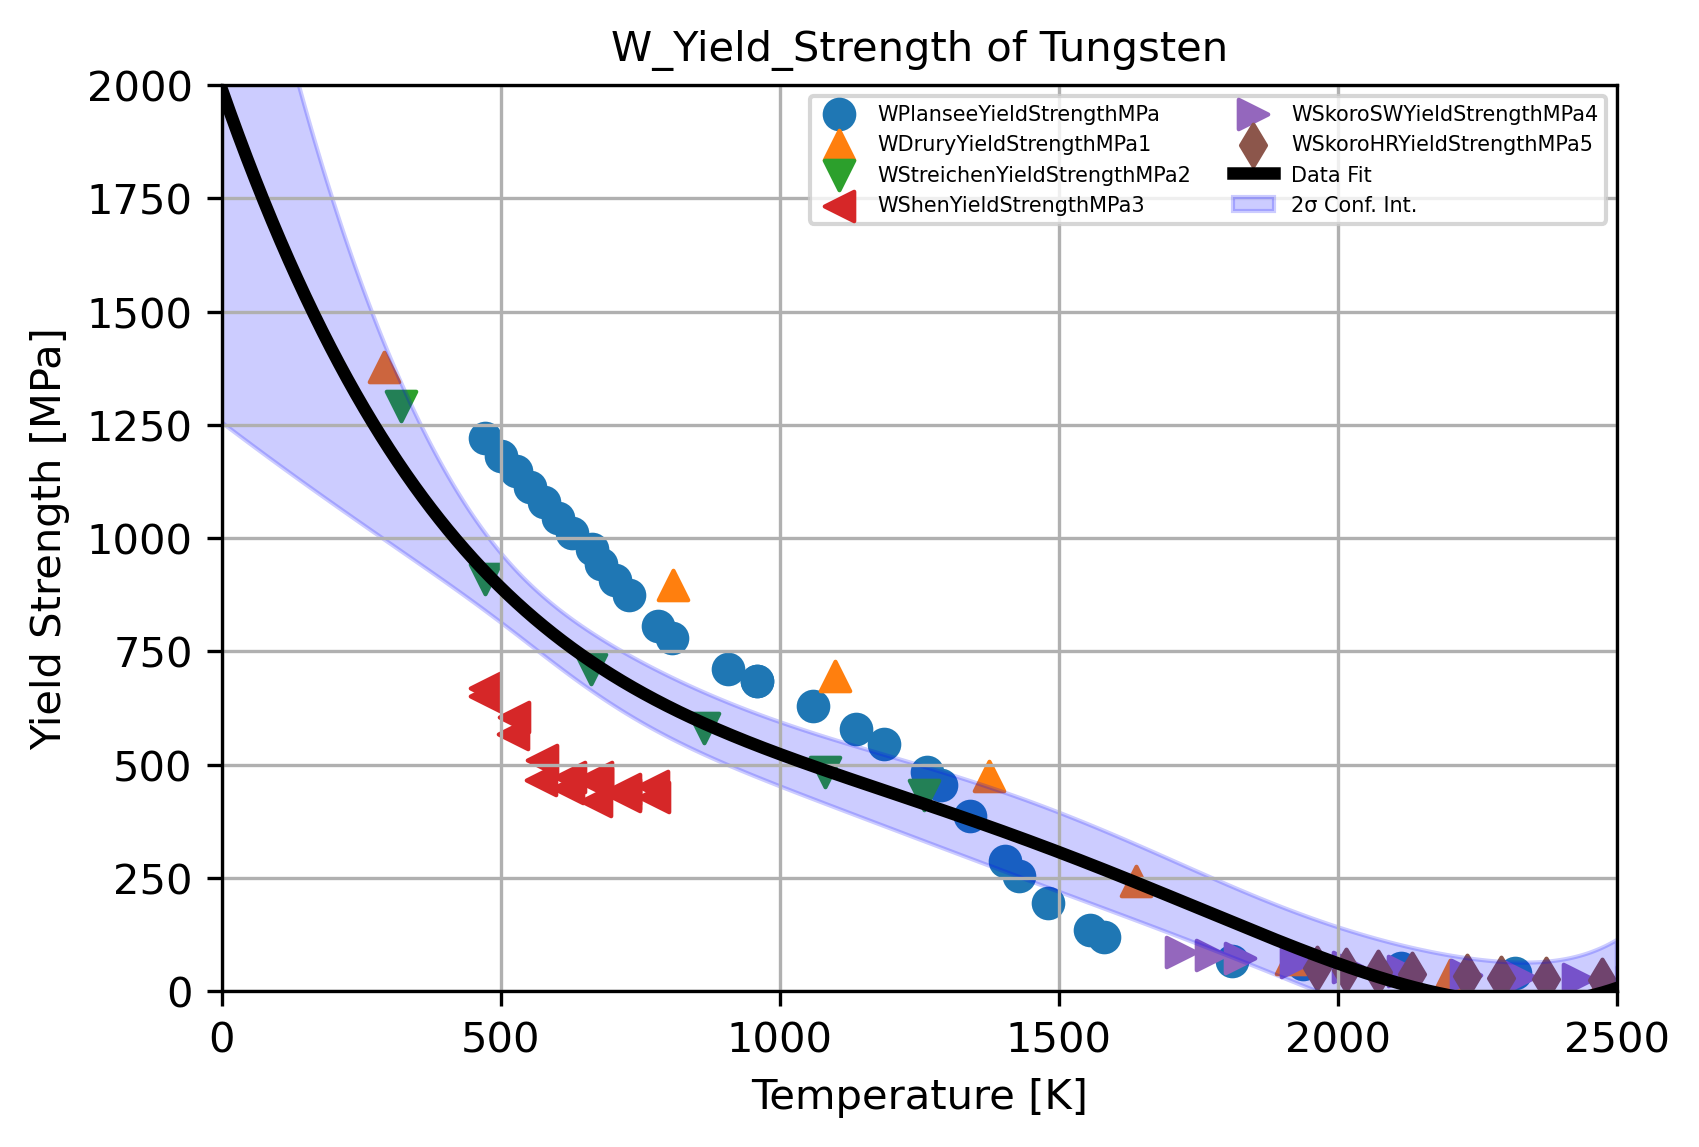

In [70]:
material_property = "W_Yield_Strength"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=35)
x_label = 'Temperature [K]'
y_label = 'Yield Strength [MPa]'
x_lim=[0, 2500]
y_lim=[0, 2000]
data_labels = [var.split('_')[0] for var in var_names[1::2]]

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1,1,1]
T = np.linspace(0, 2500, 2500)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

Yield_coeff = [fit_result.params[key].value for key in fit_result.params]

def YieldStrength(T):
    return sum(Yield_coeff[i] * T**i for i in range(len(Yield_coeff)))

Data Source: [Properties of Tungsten and its Alloys Digital Materials Solutions, Inc.](https://drive.google.com/file/d/1mp070Cd-6kci5KTiufeQ5bnl779MWlaF/view?usp=drive_link)

<a id=cp></a>
<h3>2.12. W_Ultimate Strength</h3m> 

,WNogamiTempK,WNogamiUltimateStrengthMPa,WkdopedWRefitTempK1,WkdopedWRefitUltimateStrengthMPa1
0,-3.589744,859.536542,87.948718,1118.003565
1,86.153846,900.534759,213.589744,870.231729
2,208.205128,757.932264,335.641026,850.623886
3,330.256410,631.372549,472.051282,848.841355
4,464.871795,538.680927,592.307692,772.192513
5,590.512821,583.244207,725.128205,720.499109
6,721.538462,540.463458,856.153846,736.541889
7,863.333333,519.073084,1112.820513,667.023173
8,1105.641026,486.987522,1365.897436,629.590018
9,1371.282051,429.946524,NaN,NaN



**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


**Fitting parameters for Tungsten W_Ultimate Strength** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 19
    # variables        = 3
    chi-square         = 237716.751
    reduced chi-square = 14857.2969
    Akaike info crit   = 185.253527
    Bayesian info crit = 188.086844
    R-squared          = 0.56784049
[[Variables]]
    c0:  953.208850 +/- 69.6855324 (7.31%) (init = 1)
    c1: -0.60107648 +/- 0.23942513 (39.83%) (init = 1)
    c2:  2.2191e-04 +/- 1.6786e-04 (75.64%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9591
    C(c0, c1) = -0.8397
    C(c0, c2) = +0.7019


**The equation for Tungsten W_Ultimate Strength is:**


<IPython.core.display.Latex object>

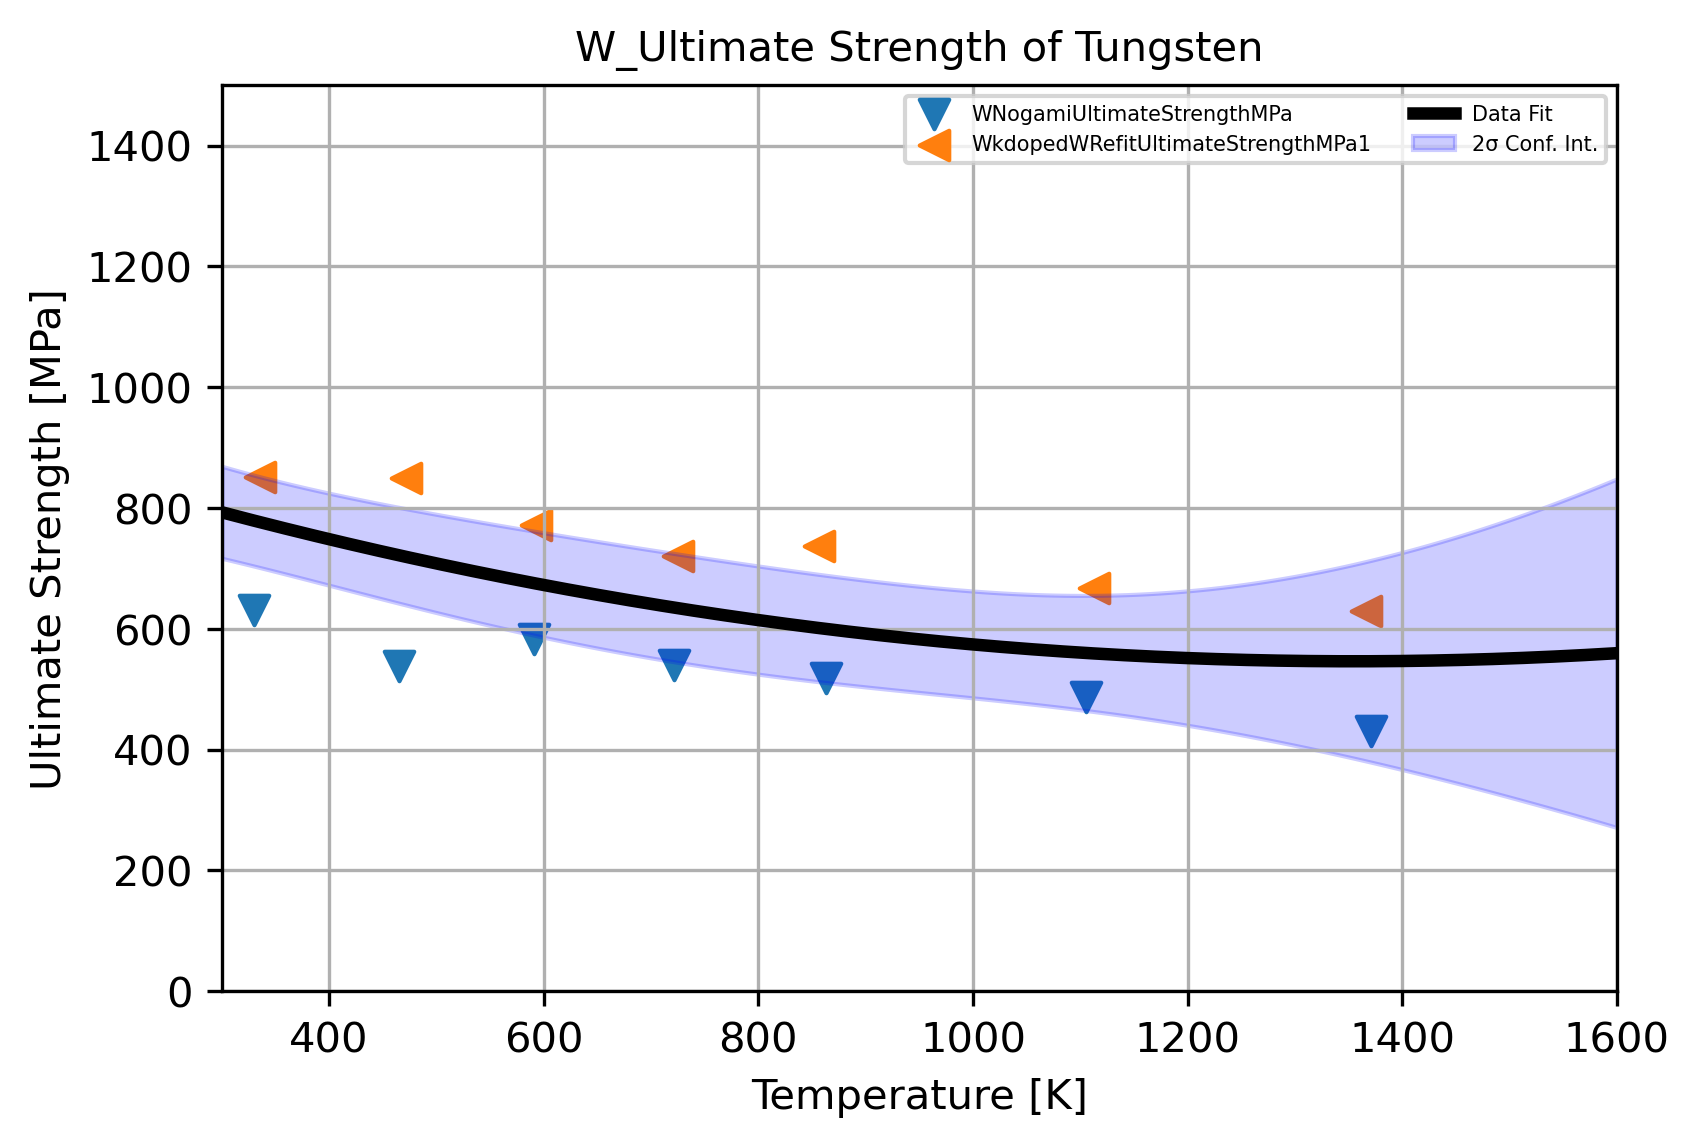

In [34]:
material_property = "W_Ultimate Strength"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15)
x_label = 'Temperature [K]'
y_label = 'Ultimate Strength [MPa]'
x_lim=[300, 1600]
y_lim=[0, 1500]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1]
T = np.linspace(300, 1600, 2000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

Ultimate_coeff = [fit_result.params[key].value for key in fit_result.params]

def UltimateStrength(T):
    return sum(Ultimate_coeff[i] * T**i for i in range(len(Ultimate_coeff)))

<a id=cp></a>
<h3>2.13. Total Elongation</h3m> 

,WNogamiTempK,WNogamiTotalElongation%,WKdopedWReNogamiTempK1,WKdopedWReNogamiTotalElongation%1,WHREPTempK2,WHREPTotalElongation%2,WHRAMTempK3,WHRAMTotalElongation%3,WForgeTempK4,WForgeTotalElongation%4
0,356.249903,0.000000,288.019489,19.164391,298.430899,0.116733,297.307303,0.176748,422.588202,1.419229
1,464.349493,16.997835,354.972079,6.314556,422.588202,0.161744,473.711798,2.191549,423.150000,0.281437
2,568.541869,21.712477,442.803079,14.925112,472.588202,0.095876,472.588202,3.389289,472.588202,1.173720
3,657.105388,14.084181,537.105825,21.097883,523.150000,11.646707,522.588202,13.143780,523.150000,0.029940
4,762.600168,13.243073,627.491153,15.086792,573.150000,18.766467,571.464607,31.101998,523.711798,1.646639
5,862.885330,10.619602,726.492811,16.385145,623.711798,29.658615,572.026404,34.095943,573.150000,0.562874
6,1165.043219,10.773616,823.521462,11.310389,673.711798,29.592747,622.588202,31.275516,573.711798,3.975981
7,1372.125566,16.293678,920.807479,11.296813,722.588202,35.634798,622.588202,28.760546,623.711798,5.287358
8,1562.276651,61.802713,1107.230258,13.145323,774.273596,36.227410,623.150000,25.407186,623.711798,13.610711
9,NaN,NaN,1288.711055,15.088250,NaN,NaN,672.588202,31.808451,673.150000,14.682635



**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


**Fitting parameters for Tungsten W_Total_Elongation** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 59
    # variables        = 4
    chi-square         = 5761.24374
    reduced chi-square = 104.749886
    Akaike info crit   = 278.300902
    Bayesian info crit = 286.611051
    R-squared          = 0.38158118
[[Variables]]
    c0: -75.6563581 +/- 20.3770512 (26.93%) (init = 1)
    c1:  0.34320198 +/- 0.08391100 (24.45%) (init = 1)
    c2: -3.9688e-04 +/- 1.0674e-04 (26.90%) (init = 1)
    c3:  1.4536e-07 +/- 4.0788e-08 (28.06%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9930
    C(c1, c2) = -0.9874
    C(c0, c1) = -0.9803
    C(c1, c3) = +0.9633
    C(c0, c2) = +0.9393
    C(c0, c3) = -0.8983


**The equation for Tungsten W_Total_Elongation is:**


<IPython.core.display.Latex object>

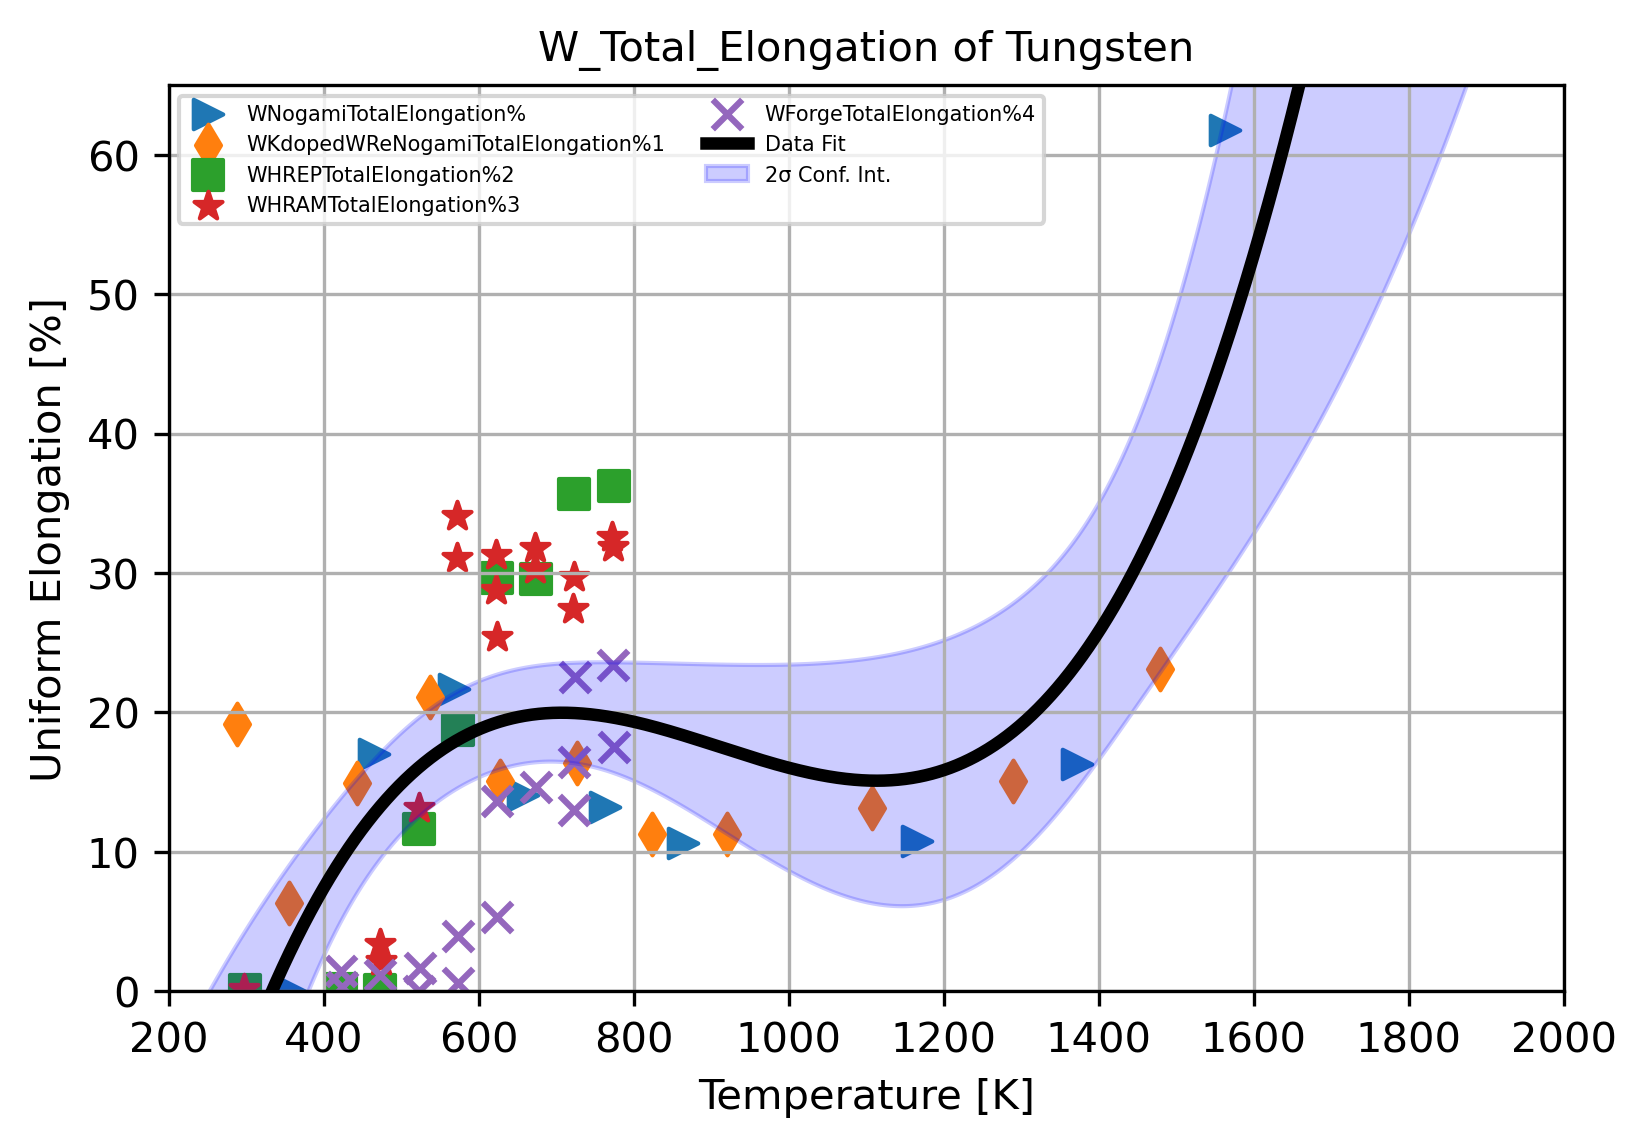

In [36]:
material_property = "W_Total_Elongation"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15)
x_label = 'Temperature [K]'
y_label = 'Uniform Elongation [%]'
x_lim=[200, 2000]
y_lim=[0, 65]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1,1]
T = np.linspace(200, 2000, 2000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

Total_e_coeff = [fit_result.params[key].value for key in fit_result.params]

def TotalElongation(T):
    return sum(Total_e_coeff[i] * T**i for i in range(len(Total_e_coeff)))

<a id=cp></a>
<h3>2.14. Uniform Elongation</h3m> 

,WNogamiTempK,WNogamiUniformElongation%,WKdopedWReNogamiTempK1,WKdopedWReNogamiUniformElongation%1,WHREPTempK2,WHREPUniformElongation%2,WHRAMTempK3,WHRAMUniformElongation%3,WForgeTempK4,WForgeUniformElongation%4
0,367.835592,0.000000,305.879419,13.924411,523.150000,6.556886,523.150000,6.257485,522.588202,1.407253
1,472.526643,2.695494,372.482392,7.253985,573.150000,6.670659,473.150000,2.131737,573.150000,3.437126
2,566.722526,4.983728,475.676812,10.654594,623.150000,9.778443,572.588202,7.808451,623.150000,2.652695
3,677.662117,3.885376,579.500423,8.474716,673.150000,8.215569,623.150000,6.604790,623.150000,4.089820
4,767.527302,1.505613,673.085579,4.594534,722.588202,6.353361,623.150000,5.526946,673.150000,3.844311
5,861.252384,1.231024,764.355158,6.120448,773.711798,5.149633,672.026404,5.401332,673.150000,3.125749
6,975.782843,0.773378,877.936681,3.025022,NaN,NaN,722.588202,6.353361,723.150000,4.257485
7,1178.971554,0.819142,973.728812,2.153071,NaN,NaN,773.150000,3.293413,723.150000,2.520958
8,1373.502568,1.002201,1163.939042,1.935083,NaN,NaN,NaN,NaN,723.711798,2.161609
9,1567.338481,25.760893,1369.038425,1.717095,NaN,NaN,NaN,NaN,773.150000,3.652695



**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)


**Fitting parameters for Tungsten W_Uniform_Elongation** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 47
    # variables        = 4
    chi-square         = 651.343940
    reduced chi-square = 15.1475335
    Akaike info crit   = 131.557841
    Bayesian info crit = 138.958431
    R-squared          = 0.24311848
[[Variables]]
    c0:  0.33227369 +/- 10.0466059 (3023.59%) (init = 1)
    c1:  0.03810342 +/- 0.03767501 (98.88%) (init = 1)
    c2: -6.8290e-05 +/- 4.4325e-05 (64.91%) (init = 1)
    c3:  3.0970e-08 +/- 1.5967e-08 (51.56%) (init = 3)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.9926
    C(c1, c2) = -0.9872
    C(c0, c1) = -0.9819
    C(c1, c3) = +0.9616
    C(c0, c2) = +0.9411
    C(c0, c3) = -0.8978


**The equation for Tungsten W_Uniform_Elongation is:**


<IPython.core.display.Latex object>

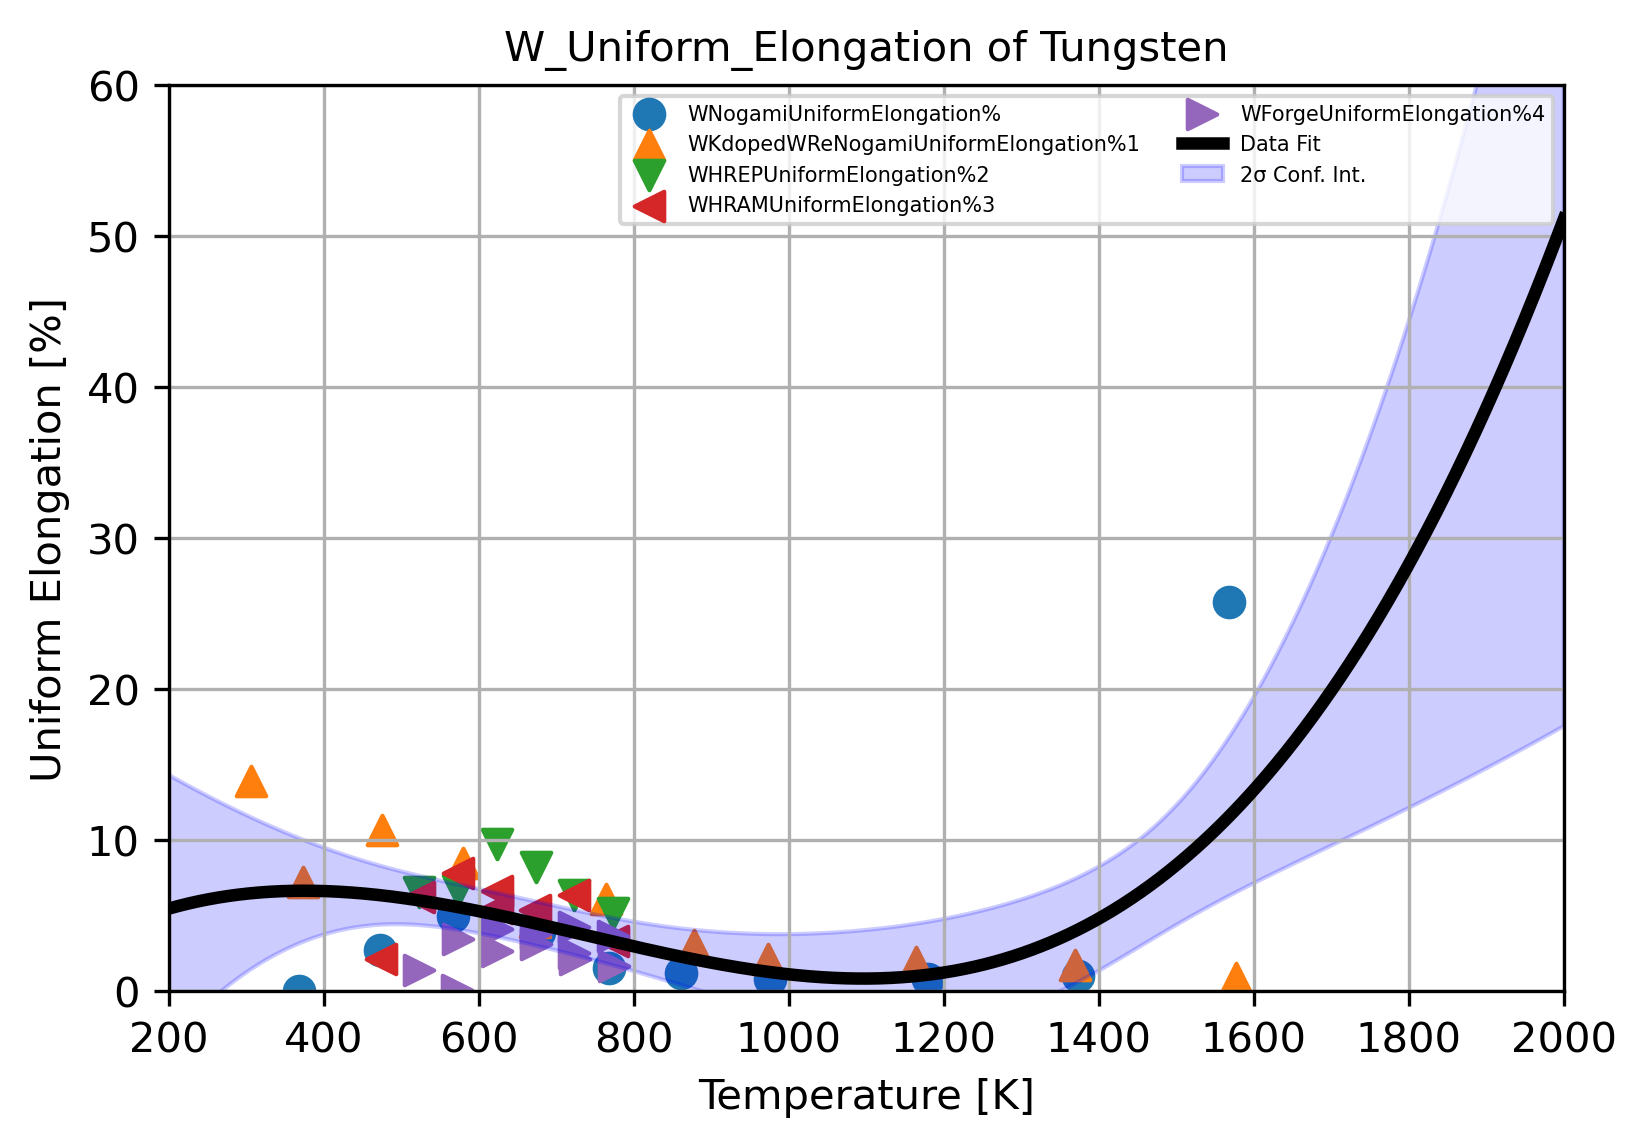

In [38]:
material_property = "W_Uniform_Elongation"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=15)
x_label = 'Temperature [K]'
y_label = 'Uniform Elongation [%]'
x_lim=[200, 2000]
y_lim=[0, 60]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Nogami2021-- Mechanical properties of tungsten-Recent research on modified tungsten materials in Japan](https://drive.google.com/file/d/1zauZKW21QloQ4LA3BcDXD8PHHT6UuJVX/view?usp=drive_link)
- [Shen2016--Microstructure and tensile properties of tungsten at elevated temperatures](https://drive.google.com/file/d/1IIk2v-ePELq5WsIQB9tqCQz1X9w4669M/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1,1]
T = np.linspace(200, 2000, 2000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

Uniform_e_coeff = [fit_result.params[key].value for key in fit_result.params]

def UniformElongation(T):
    return sum(Uniform_e_coeff[i] * T**i for i in range(len(Uniform_e_coeff)))

<a id=cp></a>
<h3>2.15. Stress-Strain Curves (Linear Hardening)</h3m> 

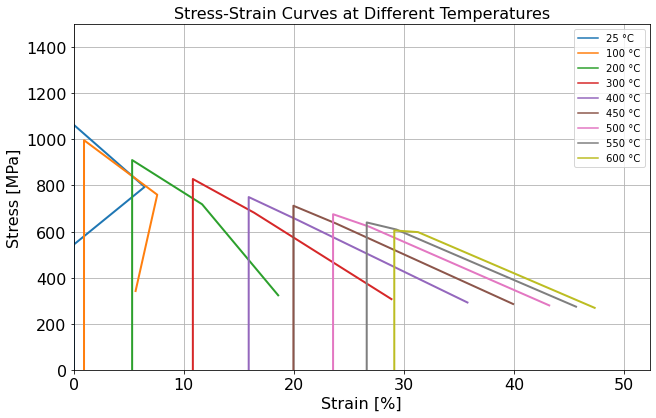

In [40]:
def FractureStrength(T): return 0.45*(UltimateStrength(T))
def stress_strain_curve(T, shift=0):
    x0, y0 = 0 + shift, 0
    
    # Point 1 (at Yield Strength with slope = Young's Modulus)
    y1 = YieldStrength(T)
    x1 = 1e-3*100*y1 / Young(T) + shift  # x1 = y1 / slope, modulus is in GPa and strain is in %
    
    # Point 2 (Ultimate strength at Uniform Elongation)
    x2 = UniformElongation(T) + shift
    y2 = UltimateStrength(T)
    
    # Point 3 (Fracture Strength at Total Elongation)
    x3 = TotalElongation(T) + shift
    y3 = FractureStrength(T)
    
    
    # Define the points for stress-strain
    x_values = [x0, x1, x2, x3]
    y_values = [y0, y1, y2, y3]
    
    return x_values, y_values

# Define a function to plot multiple stress-strain curves
def plot_multiple_stress_strain(temperatures, shift_percent=0.2):
    plt.figure()
    
    # Plot each curve with a shift in strain values
    for i, T in enumerate(temperatures):
        shift = i * shift_percent * TotalElongation(T)  # Shift by 20% of Total Elongation for clarity
        x_values, y_values = stress_strain_curve(T, shift=shift)
        plt.plot(x_values, y_values, marker='', linestyle='-', label=f'{T-273} °C')
    
    plt.xlabel('Strain [%]', fontsize=16)  # Set font size for x-axis label
    plt.ylabel('Stress [MPa]', fontsize=16)  # Set font size for y-axis label
    plt.title('Stress-Strain Curves at Different Temperatures', fontsize=16)  # Set font size for title
    
    
    # Modify legend position and line thickness, and remove data points
    plt.legend(loc='best', fontsize=10)  # Control legend position (e.g., 'upper right', 'lower left')
    
    # Control line thickness
    for line in plt.gca().get_lines():
        line.set_linewidth(2)  # Set the line thickness to 2
    
    # Control graph size and center it in the page
    plt.gcf().set_size_inches(10, 6)  # Set figure size (width, height in inches)
    plt.gcf().subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # Centering the graph
    
    plt.grid(True)
    plt.xlim(0, max(x_values) + 5)  # Adjust x-axis limit for better visualization
    plt.ylim(0, 1500)  # Adjust y-axis limit as needed
    plt.tick_params(axis='both', which='major', labelsize=16)  # Set font size for tick labels
    plt.show()


temperatures = [273 + T for T in [25, 100, 200, 300, 400, 450, 500, 550, 600]]
plot_multiple_stress_strain(temperatures,0.2)

<a id=cp></a>
<h3>2.15. Ductility</h3m> 

,WCFETRTempC,WCFETRFlexuralStrain%,WIGPTempC1,WIGPFlexuralStrain%1
0,200.00000,0.470564,200.00000,0.263071
1,250.00000,0.892960,300.00000,0.537258
2,300.00000,4.479621,350.78125,3.397810
3,325.00000,6.143269,400.78125,5.843261
4,350.78125,13.720577,450.00000,8.807328
5,375.78125,17.355406,474.21875,15.035701
6,NaN,NaN,500.00000,15.247015
7,NaN,NaN,525.00000,14.265130
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN



**Data Source:**  
- [Yin2019--Ductile to brittle transition in ITER specification tungsten assessed by combined fracture toughness and bending tests analysis](https://drive.google.com/file/d/1z0JSe9wz5X57qdcZ9e5d_xXWLx2qY58V/view?usp=drive_link)


**Fitting parameters for Tungsten W_ductility** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 14
    # variables        = 3
    chi-square         = 185.984441
    reduced chi-square = 16.9076765
    Akaike info crit   = 42.2124797
    Bayesian info crit = 44.1296517
    R-squared          = 0.64534312
[[Variables]]
    c0: -13.8929804 +/- 13.6608641 (98.33%) (init = 1)
    c1:  0.07334757 +/- 0.07945178 (108.32%) (init = 1)
    c2: -3.4187e-05 +/- 1.0940e-04 (320.00%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9905
    C(c0, c1) = -0.9851
    C(c0, c2) = +0.9549


**The equation for Tungsten W_ductility is:**


<IPython.core.display.Latex object>

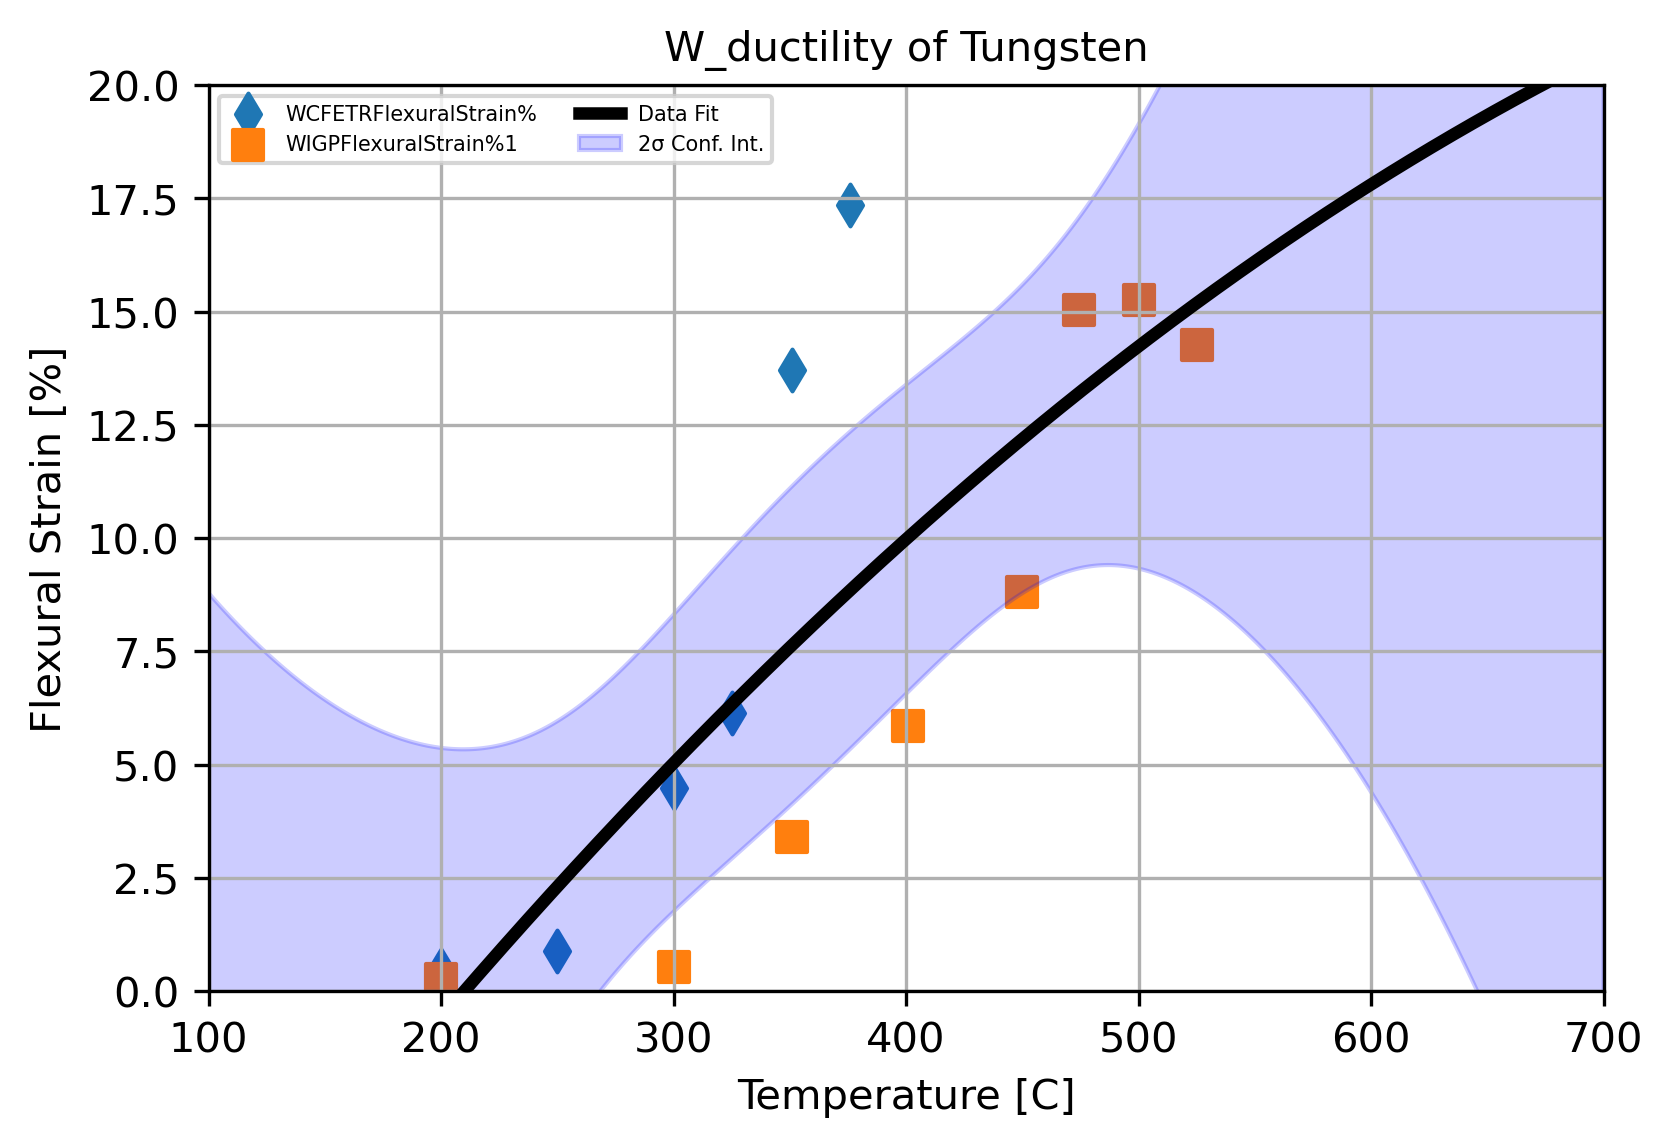

In [42]:
material_property = "W_ductility"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=10)
x_label = 'Temperature [C]'
y_label = 'Flexural Strain [%]'
x_lim=[100, 700]
y_lim=[0, 20]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Yin2019--Ductile to brittle transition in ITER specification tungsten assessed by combined fracture toughness and bending tests analysis](https://drive.google.com/file/d/1z0JSe9wz5X57qdcZ9e5d_xXWLx2qY58V/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1]
T = np.linspace(100, 700, 1000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

<a id=cp></a>
<h3>2.14. Toughness</h3m> 

,WCFETRTempC,WCFETRFractureToughnessMPa·m\n^1/2,WCFETR1TempC1,WCFETR1FractureToughnessMPa·m\n^1/21
0,23.819643,9.156118,21.996117,8.484848
1,101.284302,10.000000,102.288088,8.484848
2,200.868521,12.869198,201.553245,8.316498
3,304.444239,25.527426,301.108408,18.080808
4,353.044442,29.409283,401.912065,20.606061
5,380.042502,35.991561,452.146772,41.144781
6,404.545875,33.122363,501.929268,46.195286
7,454.772244,38.523207,551.716680,51.414141
8,504.056177,35.316456,601.454939,54.949495
9,555.890234,42.067511,NaN,NaN



**Data Source:**  
- [Yin2019--Ductile to brittle transition in ITER specification tungsten assessed by combined fracture toughness and bending tests analysis](https://drive.google.com/file/d/1z0JSe9wz5X57qdcZ9e5d_xXWLx2qY58V/view?usp=drive_link)


**Fitting parameters for Tungsten W_toughness** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 19
    # variables        = 3
    chi-square         = 399.003635
    reduced chi-square = 24.9377272
    Akaike info crit   = 63.8460994
    Bayesian info crit = 66.6794163
    R-squared          = 0.91030896
[[Variables]]
    c0:  6.72962787 +/- 3.39811094 (50.49%) (init = 1)
    c1:  0.01855434 +/- 0.02516739 (135.64%) (init = 1)
    c2:  1.0196e-04 +/- 4.0226e-05 (39.45%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9669
    C(c0, c1) = -0.8318
    C(c0, c2) = +0.6917


**The equation for Tungsten W_toughness is:**


<IPython.core.display.Latex object>

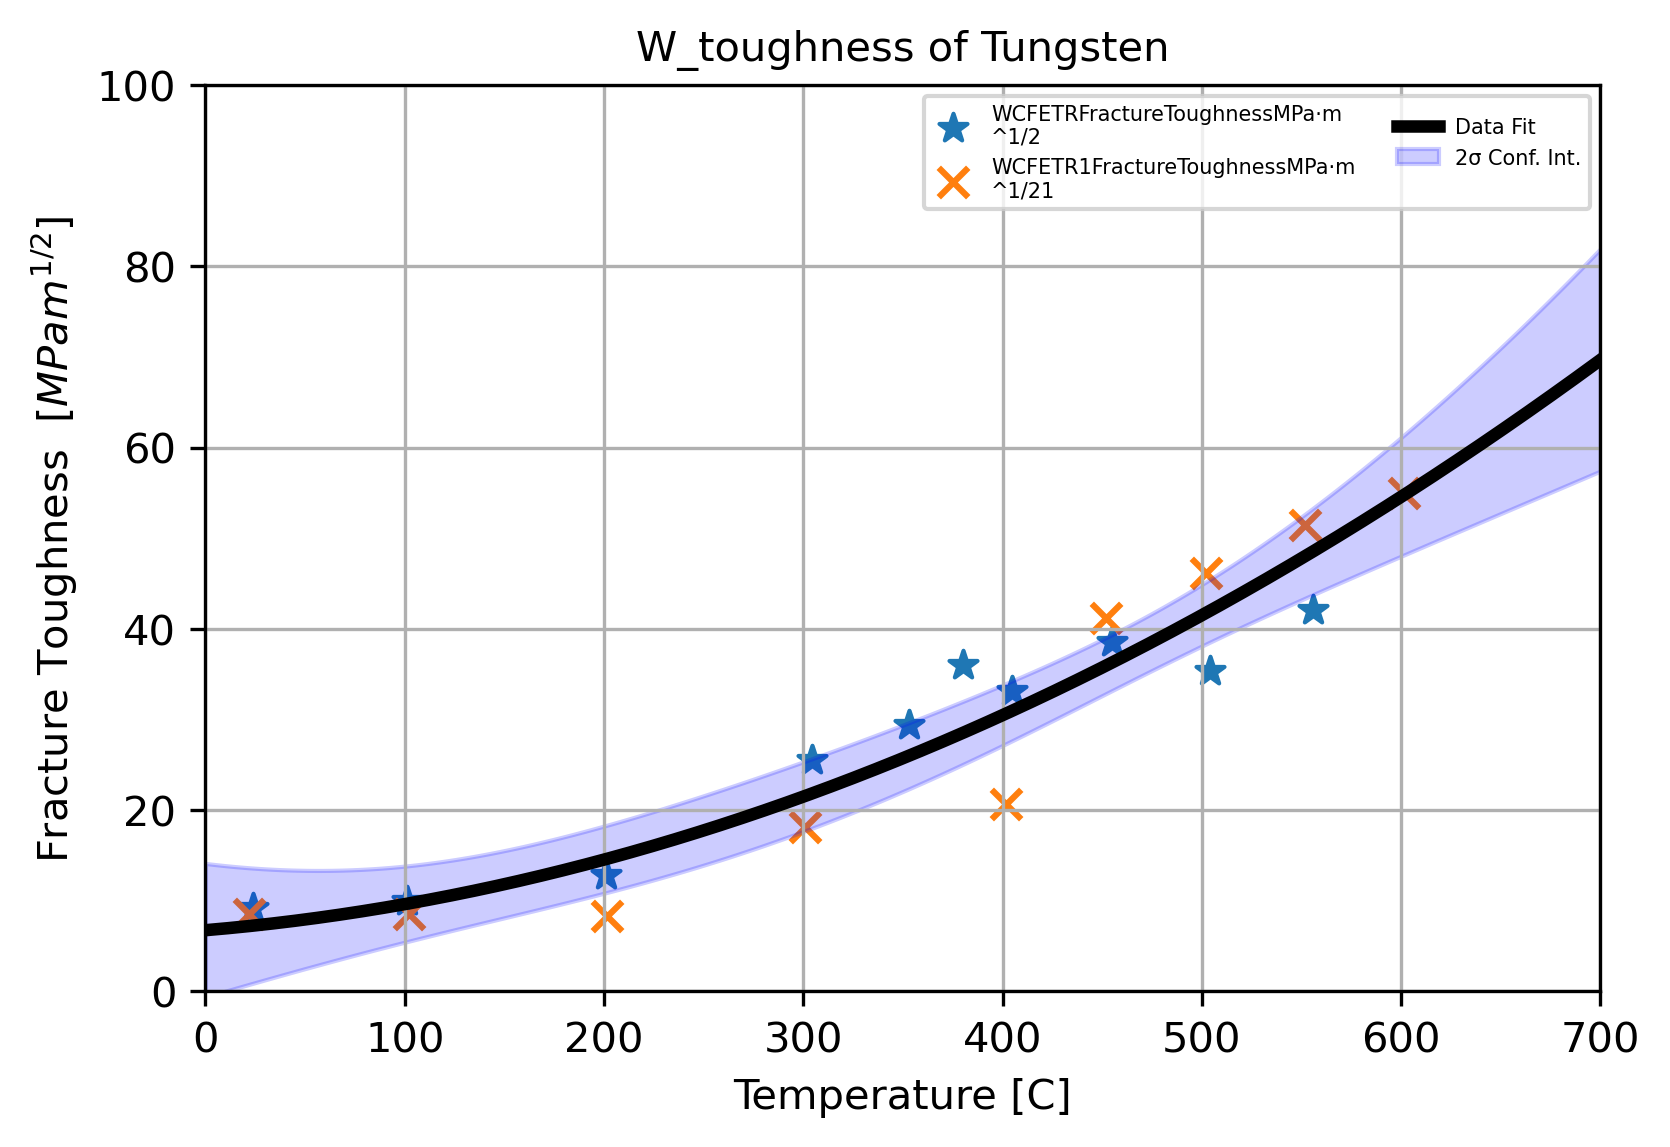

In [44]:
material_property = "W_toughness"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=10)
x_label = 'Temperature [C]'
y_label = 'Fracture Toughness  [$MPa m^{1/2}$]'
x_lim=[0, 700]
y_lim=[0, 100]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Yin2019--Ductile to brittle transition in ITER specification tungsten assessed by combined fracture toughness and bending tests analysis](https://drive.google.com/file/d/1z0JSe9wz5X57qdcZ9e5d_xXWLx2qY58V/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1]
T = np.linspace(0, 700, 1000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

<a id=cp></a>
<h3>2.15. Creep</h3m> 

,W5Re1yearTempC,W5Re1yearStressMPa,W5Re3yearTempC1,W5Re3yearStressMPa1,W5Re10yearTempC2,W5Re10yearStressMPa2,W5Re2/3yieldTempC3,W5Re2/3yieldStressMPa3,W5Re1/3ultimateTempC4,W5Re1/3ultimateStressMPa4,W1yearTempC5,W1yearStressMPa5,W3yearTempC6,W3yearStressMPa6,W10yearTempC7,W10yearStressMPa7,W1/3ultimateTempC8,W1/3ultimateStressMPa8,W2/3yieldTempC9,W2/3yieldStressMPa9
0,147.320953,4.808081,144.113582,4.787879,140.905492,4.747475,134.952134,7.656566,137.096379,7.838384,152.731331,2.548992,149.647986,2.624439,146.285604,2.661465,9.150229,18.394363,31.712421,12.924081
1,155.486936,4.000000,152.279565,3.979798,148.715180,3.939394,163.729216,5.333333,164.424530,4.848485,165.351263,2.017429,161.709846,2.016034,158.067355,2.052952,30.566228,13.843182,40.766061,9.709159
2,165.784208,3.010101,161.864968,3.010101,158.656878,2.969697,192.873389,3.313131,193.218167,2.989899,175.166885,1.599734,171.523321,1.674966,167.602868,1.635150,40.403314,12.659211,53.690785,8.296486
3,175.019074,2.202020,170.743540,2.202020,166.822141,2.141414,221.697977,2.323232,220.249766,1.676768,NaN,NaN,NaN,NaN,NaN,NaN,53.056515,10.939921,63.534311,6.882633
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.716757,10.369293,74.482174,6.043916
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.657108,9.798772,99.722037,4.980789
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.014102,8.654081,149.665157,2.011419
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.375990,8.734680,199.813261,1.724119
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.396961,8.086029,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.870635,4.575866,NaN,NaN



**Data Source:**  
- [ghoniem1999--design window 4 tungsten.pdf](https://drive.google.com/file/d/1LakJBhKyc-DpfNvfFS0UUFYXjmZ5aHCI/view?usp=drive_link)


**Fitting parameters for Tungsten W_creep** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 52
    # variables        = 3
    chi-square         = 99.1235131
    reduced chi-square = 2.02292884
    Akaike info crit   = 39.5463940
    Bayesian info crit = 45.4001251
    R-squared          = 0.86863369
[[Variables]]
    c0:  16.9210105 +/- 0.85375627 (5.05%) (init = 1)
    c1: -0.13067105 +/- 0.01459152 (11.17%) (init = 1)
    c2:  2.8310e-04 +/- 5.7985e-05 (20.48%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9699
    C(c0, c1) = -0.9008
    C(c0, c2) = +0.7842


**The equation for Tungsten W_creep is:**


<IPython.core.display.Latex object>

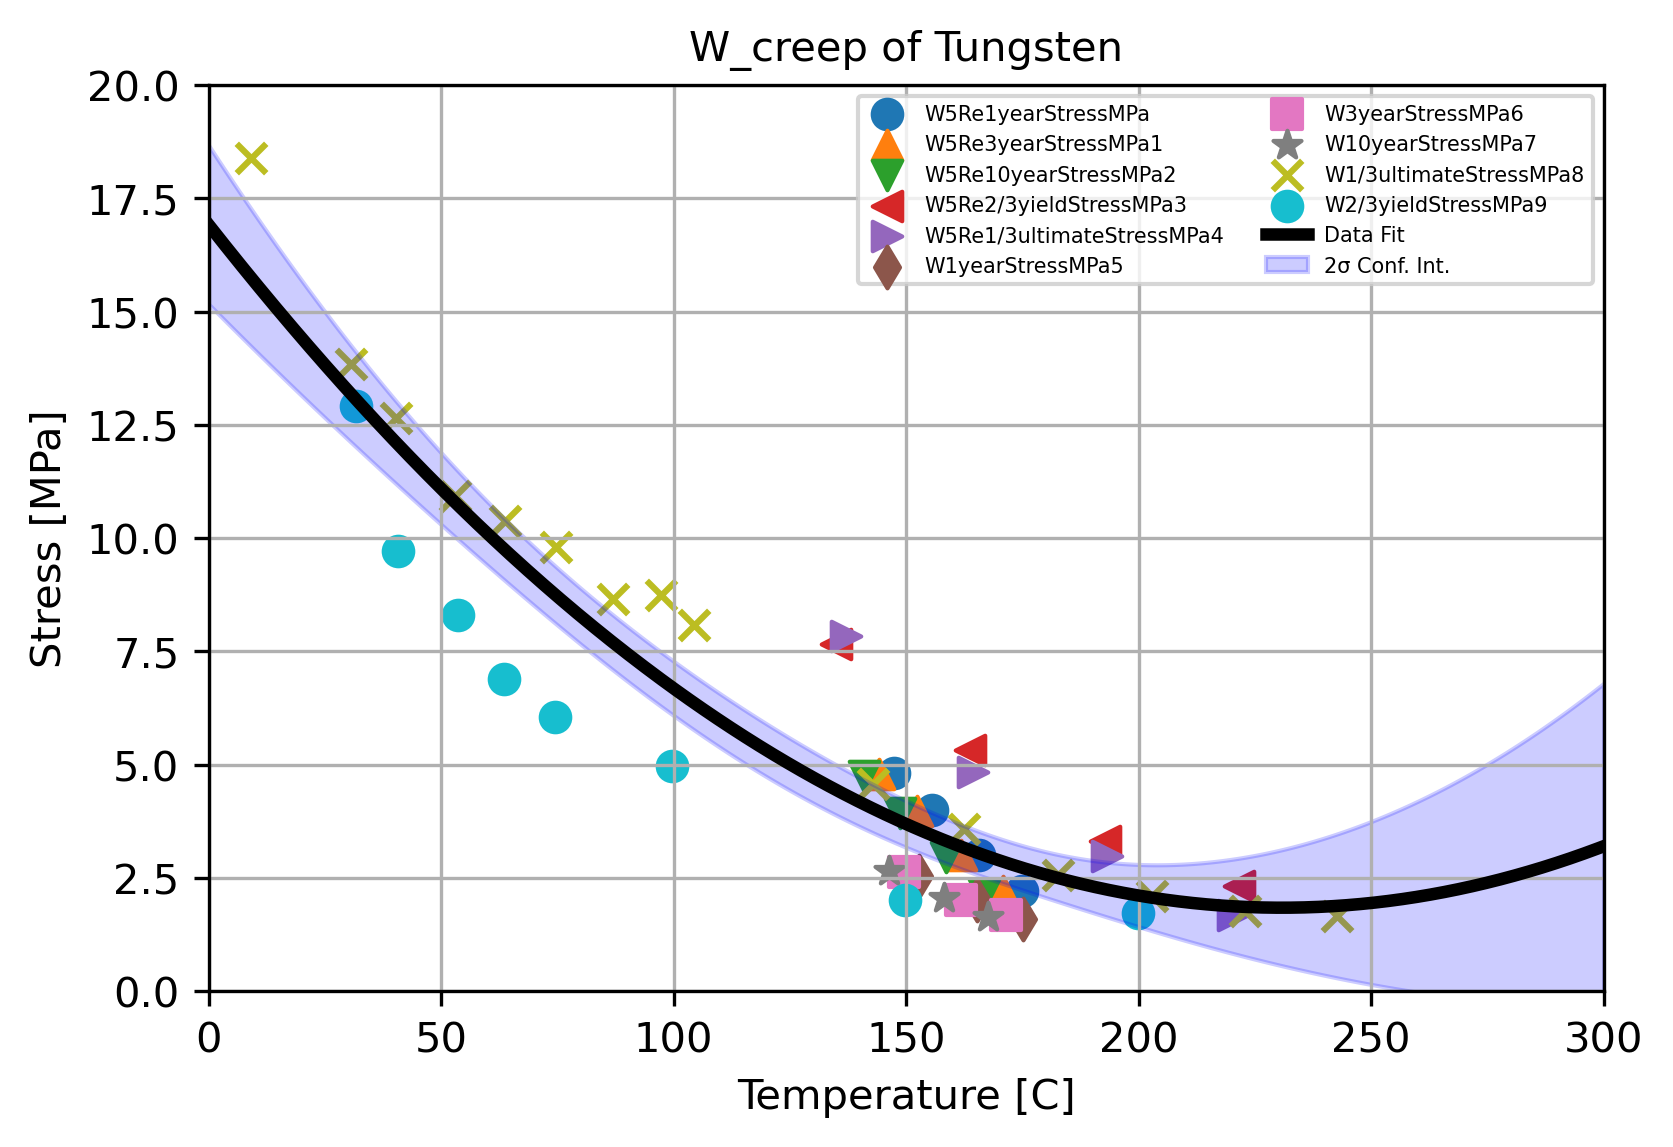

In [46]:
material_property = "W_creep"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=20)
x_label = 'Temperature [C]'
y_label = 'Stress [MPa]'
x_lim=[0, 300]
y_lim=[0, 20]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [ghoniem1999--design window 4 tungsten.pdf](https://drive.google.com/file/d/1LakJBhKyc-DpfNvfFS0UUFYXjmZ5aHCI/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y

# Fit the data
p = [1, 1, 1]
T = np.linspace(0, 300, 500)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)
plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5)

<a id=cp></a>
<h3>2.16. Fatigue</h3m> 

,WRLUCyclestofailureN,WRLUStressMpa,WRLPCyclestofailureN1,WRLPStressMpa1,WFUCyclestofailureN2,WFUStressMpa2,WFPCyclestofailureN3,WFPStressMpa3,W280CRLPCyclestofailureN4,W280CRLPStressMpa4,W280FUCyclestofailureN5,W280FUStressMpa5,W280FPCyclestofailureN6,W280FPStressMpa6,W480FPCyclestofailureN7,W480FPStressMpa7
0,1.002610e+00,318.103077,1.355342e+02,288.750644,1.023363e+00,212.571150,6.863229e+04,187.344915,1.218752e+01,264.492946,5.561833e+02,311.405377,8.600542e+01,221.875202,1.002181e+00,222.468689
1,1.007458e+00,160.974277,3.189045e+02,263.538515,4.055684e+03,225.422318,9.864263e+04,171.446709,2.530424e+01,301.688380,3.259062e+03,324.061032,2.302233e+02,217.139897,4.412684e+02,272.762195
2,4.811525e+01,349.116570,6.688920e+02,275.365186,3.881494e+04,213.533930,2.449869e+05,186.579629,4.891204e+01,263.847305,1.240422e+05,257.737988,2.023916e+06,246.316066,1.498727e+03,179.597364
3,7.098748e+01,336.974262,3.867996e+03,313.126953,9.502204e+04,201.460392,2.858481e+05,156.581815,2.024419e+06,250.920084,2.057123e+06,297.879274,1.995206e+06,231.585005,1.669997e+03,184.647397
4,7.375695e+01,323.846252,6.537646e+04,251.597227,4.632439e+05,202.144565,2.011642e+05,141.993765,2.028497e+06,288.212634,2.027338e+06,277.623391,2.020951e+06,219.152357,3.080589e+04,197.150185
5,3.035246e+02,311.843247,1.253820e+05,289.678157,6.923347e+05,188.596881,3.751710e+05,142.078405,2.027137e+06,275.781784,2.026784e+06,272.558971,1.992630e+06,207.644109,3.136377e+05,196.380450
6,4.799233e+04,299.866692,2.466096e+05,313.691219,1.981969e+06,189.208757,1.975558e+06,126.825578,1.969153e+06,238.032430,2.023111e+06,238.949636,2.045757e+06,195.209663,1.989909e+06,182.322008
7,5.839031e+04,325.690697,6.442154e+05,301.626498,1.980762e+06,177.482596,2.002889e+06,141.367782,NaN,NaN,2.018693e+06,198.434274,2.067936e+06,145.024063,1.988624e+06,170.351560
8,1.977436e+05,311.785057,5.795242e+05,264.088674,1.983321e+06,202.342058,2.004548e+06,157.315361,NaN,NaN,1.986155e+06,147.331468,NaN,NaN,NaN,NaN
9,2.532396e+05,324.482815,1.993639e+06,302.248954,NaN,NaN,2.032281e+06,171.857565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**Data Source:**  
- [Habainy2015--Fatigue behavior of rolled and forged tungsten at 25, 280 and 480 C](https://drive.google.com/file/d/1IkDJkjAsqAKMSWhdLYVp7kFL5hRw5_Pj/view?usp=drive_link)


**Fitting parameters for Tungsten W_fatigue** 


[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 85
    # variables        = 3
    chi-square         = 289530.575
    reduced chi-square = 3530.86067
    Akaike info crit   = 697.336019
    Bayesian info crit = 704.663972
    R-squared          = 0.07546826
[[Variables]]
    c0:  260.261774 +/- 10.6817035 (4.10%) (init = 1)
    c1: -1.0566e-04 +/- 5.9920e-05 (56.71%) (init = 1)
    c2:  4.3868e-11 +/- 2.8608e-11 (65.21%) (init = 2)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.9933
    C(c0, c1) = -0.5935
    C(c0, c2) = +0.5282


**The equation for Tungsten W_fatigue is:**


<IPython.core.display.Latex object>

G:\My Drive\Research\Repos\DatabaseCodes\Jupyter\Utilities\plots_2_0.py:76: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim(x_lim)


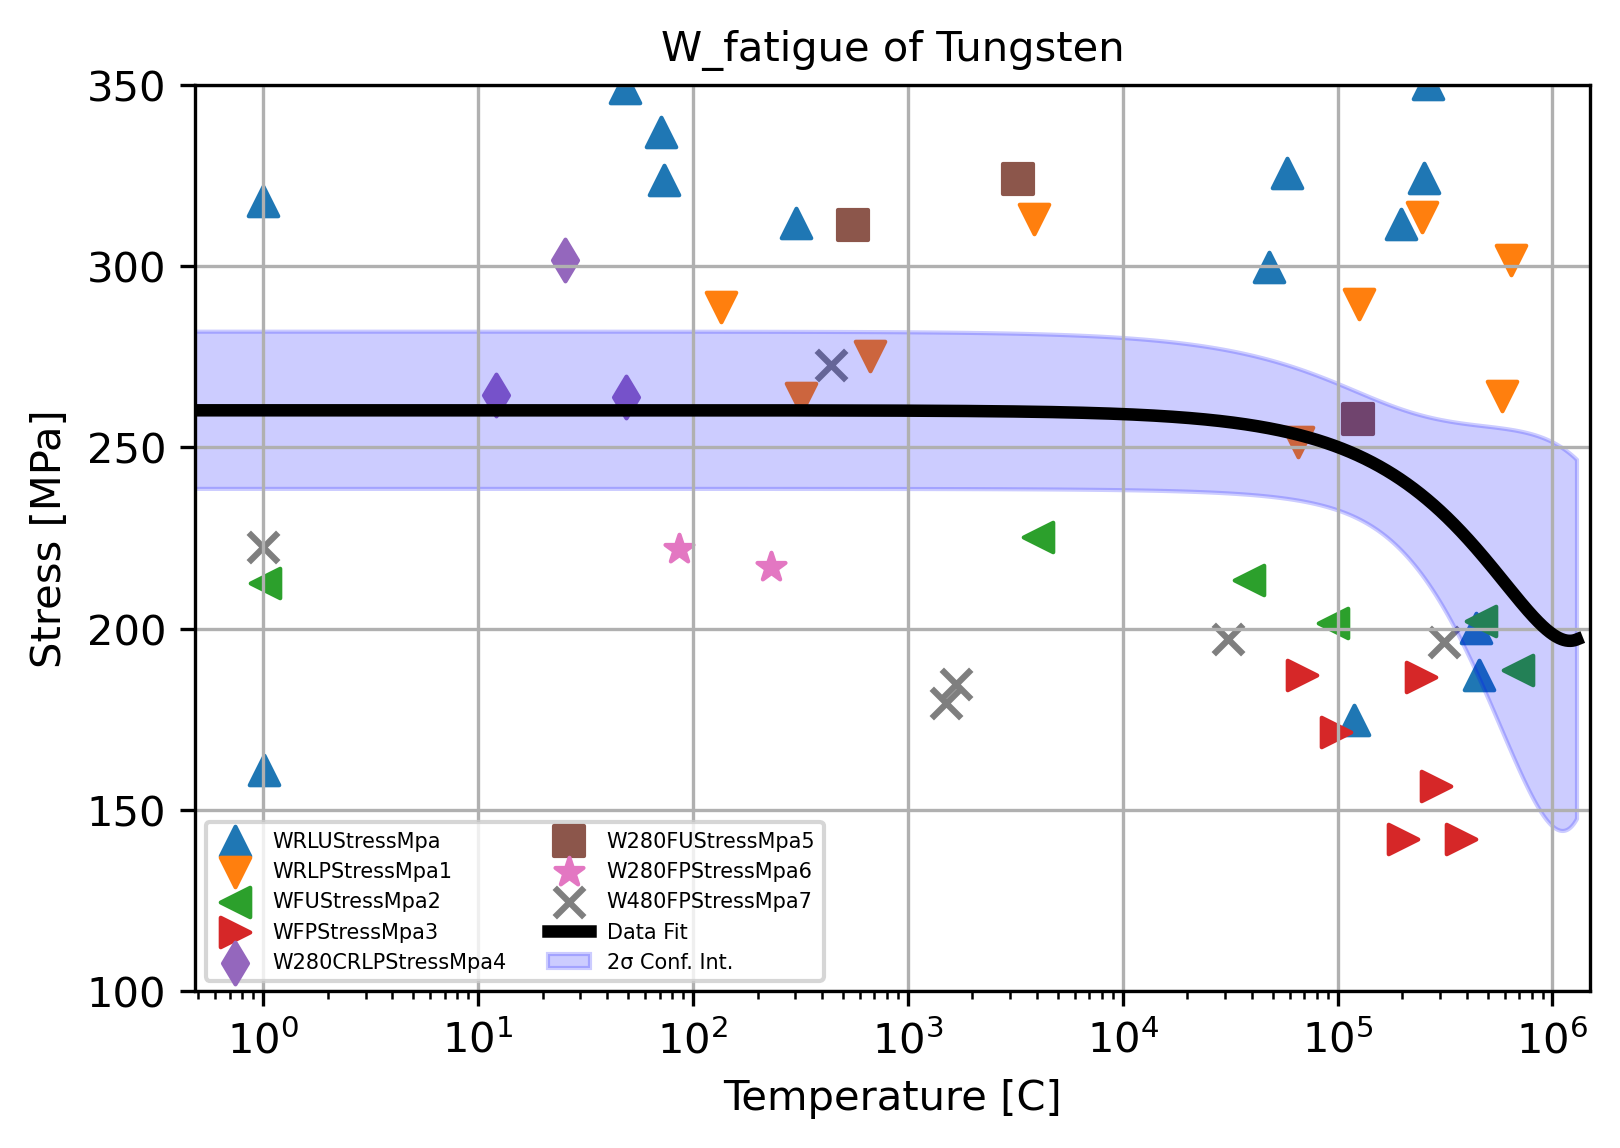

In [48]:
material_property = "W_fatigue"
var_names, variables, dataframe = load_data(excel_filename, material_property, header_rows_list=[1, 3], num_data_rows=25)
x_label = 'Temperature [C]'
y_label = 'Stress [MPa]'
x_lim=[0, 1500000]
y_lim=[100, 350]
data_labels = [var.split('_')[0] for var in var_names[1::2]]
display(Markdown("""
**Data Source:**  
- [Habainy2015--Fatigue behavior of rolled and forged tungsten at 25, 280 and 480 C](https://drive.google.com/file/d/1IkDJkjAsqAKMSWhdLYVp7kFL5hRw5_Pj/view?usp=drive_link)
"""))

vars_x = variables[::2] 
vars_y = variables[1::2]
T_data, Y_data = concatenate_and_sort(vars_x, vars_y)
x_data_list = [x for x in vars_x]
y_data_list = vars_y


# Fit the data
p = [1, 1, 1]
T = np.linspace(0, 1300000, 80000)
fit_result = get_model_fit_and_print_it(T_data, Y_data, fit_func='poly', param_initials=p, method='leastsq',\
    material_name=material_name, property_name=material_property, eq_digits=3, print_bool=True)

plot_data(x_data_list, y_data_list, T, fit_result, f_size, m_size,\
          x_label, y_label, x_lim, y_lim, data_labels,\
          title=material_property + " of " + material_name, legend_loc = 'best', legend_font_size=5, scale= "log-x")